# Compare evaluation files at Col de Porte
- Morin et al. (2012): https://doi.pangaea.de/10.1594/PANGAEA.774249 (Downloaded: 15/11/2023) -> `/home/lalandmi/Dropbox/data/SnowMIP`
- Menard et al. (2019) : https://essd.copernicus.org/articles/11/865/2019/ (data: https://doi.org/10.1594/PANGAEA.897575; downloaded: 22/11/2023) -> `/home/lalandmi/Dropbox/data/ESM-SnowMIP_all`
- Lejeune et al. (2029): https://essd.copernicus.org/articles/11/71/2019/ (data: https://doi.osug.fr/public/CRYOBSCLIM_CDP/CRYOBSCLIM.CDP.2018.html; dowloaded: 08/12/2023) -> `/home/lalandmi/Dropbox/data/ESM-SnowMIP_all/CRYOBSCLIM_CDP`

In [2]:
# Env: phd_v3
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as plot # New plot library (https://proplot.readthedocs.io/en/latest/)
plot.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures
from scipy import stats
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)
import calendar
import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
path_morin2012 = '/home/lalandmi/Dropbox/data/SnowMIP/evaluation/FR-Cdp/Morin_2012/datasets'
path_menard2019 = '/home/lalandmi/Dropbox/data/ESM-SnowMIP_all'
path_lejeune2019 = '/home/lalandmi/Dropbox/data/ESM-SnowMIP_all/CRYOBSCLIM_CDP'

# Morin2012

## Daily eval

In [173]:
df_d_eval_morin2012 = pd.read_csv(path_morin2012+'/CDP_daily_eval.tab', skiprows=23, delimiter='\t', infer_datetime_format=True, index_col=0)
df_d_eval_morin2012.index = pd.to_datetime(df_d_eval_morin2012.index)
df_d_eval_morin2012

Snow thick [m] (automated measurement, Ultra-...)  \
Date/Time                                                       
1993-09-21                                                0.0   
1993-09-22                                                0.0   
1993-09-23                                                0.0   
1993-09-24                                                0.0   
1993-09-25                                                0.0   
...                                                       ...   
2011-06-08                                                0.0   
2011-06-09                                                0.0   
2011-06-10                                                NaN   
2011-06-11                                                NaN   
2011-06-12                                                NaN   

            Snow thick [m] (pit, Ruler stick)  \
Date/Time                                       
1993-09-21                                NaN   
1993-09-22                                NaN   
1993-09-23                                NaN   
1993-09-24                                NaN   
1993-09-25                                NaN   
...                                       ...   
2011-06-08                                NaN   
2011-06-09                                NaN   
2011-06-10                                NaN   
2011-06-11                                NaN   
2011-06-12                                NaN   

            Snow thick [m] (pit south, Ruler stick)  \
Date/Time                                             
1993-09-21                                      NaN   
1993-09-22                                      NaN   
1993-09-23                                      NaN   
1993-09-24                                      NaN   
1993-09-25                                      NaN   
...                                             ...   
2011-06-08                                      NaN   
2011-06-09                                      NaN   
2011-06-10                                      NaN   
2011-06-11                                      NaN   
2011-06-12                                      NaN   

            Snow thick [m] (pit north, Ruler stick)  \
Date/Time                                             
1993-09-21                                      NaN   
1993-09-22                                      NaN   
1993-09-23                                      NaN   
1993-09-24                                      NaN   
1993-09-25                                      NaN   
...                                             ...   
2011-06-08                                      NaN   
2011-06-09                                      NaN   
2011-06-10                                      NaN   
2011-06-11                                      NaN   
2011-06-12                                      NaN   

            SWE [kg/m**2] (Cosmic Ray Counter, NRC)  \
Date/Time                                             
1993-09-21                                      NaN   
1993-09-22                                      NaN   
1993-09-23                                      NaN   
1993-09-24                                      NaN   
1993-09-25                                      NaN   
...                                             ...   
2011-06-08                                      0.0   
2011-06-09                                      0.0   
2011-06-10                                      NaN   
2011-06-11                                      NaN   
2011-06-12                                      NaN   

            SWE [kg/m**2] (pit, Calculated from weight o...)  \
Date/Time                                                      
1993-09-21                                               NaN   
1993-09-22                                               NaN   
1993-09-23                                               NaN   
1993-09-24                                               NaN

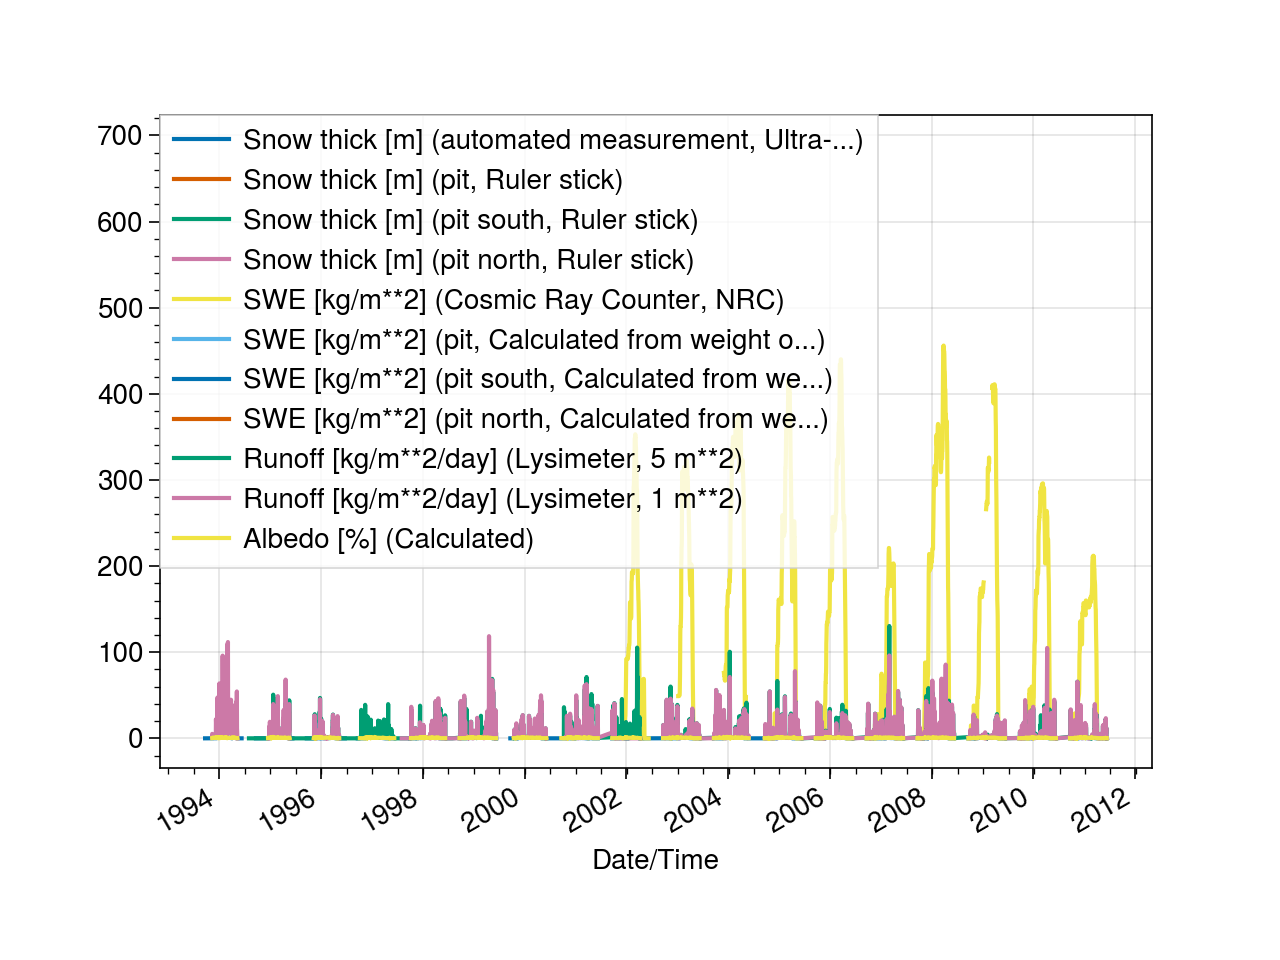

In [174]:
df_d_eval_morin2012.plot()

In [175]:
ds_d_eval_morin2012 = df_d_eval_morin2012.to_xarray()
ds_d_eval_morin2012 = ds_d_eval_morin2012.rename({'Date/Time': 'time'})
ds_d_eval_morin2012

<xarray.Dataset>
Dimensions:                                            (time: 5159)
Coordinates:
  * time                                               (time) datetime64[ns] ...
Data variables:
    Snow thick [m] (automated measurement, Ultra-...)  (time) float64 0.0 ......
    Snow thick [m] (pit, Ruler stick)                  (time) float64 nan ......
    Snow thick [m] (pit south, Ruler stick)            (time) float64 nan ......
    Snow thick [m] (pit north, Ruler stick)            (time) float64 nan ......
    SWE [kg/m**2] (Cosmic Ray Counter, NRC)            (time) float64 nan ......
    SWE [kg/m**2] (pit, Calculated from weight o...)   (time) float64 nan ......
    SWE [kg/m**2] (pit south, Calculated from we...)   (time) float64 nan ......
    SWE [kg/m**2] (pit north, Calculated from we...)   (time) float64 nan ......
    Runoff [kg/m**2/day] (Lysimeter, 5 m**2)           (time) float64 nan ......
    Runoff [kg/m**2/day] (Lysimeter, 1 m**2)           (time) float64 nan ......
    Albedo [%] (Calculated)                            (time) float64 nan ......

In [176]:
list(ds_d_eval_morin2012.keys())

['Snow thick [m] (automated measurement, Ultra-...)',
 'Snow thick [m] (pit, Ruler stick)',
 'Snow thick [m] (pit south, Ruler stick)',
 'Snow thick [m] (pit north, Ruler stick)',
 'SWE [kg/m**2] (Cosmic Ray Counter, NRC)',
 'SWE [kg/m**2] (pit, Calculated from weight o...)',
 'SWE [kg/m**2] (pit south, Calculated from we...)',
 'SWE [kg/m**2] (pit north, Calculated from we...)',
 'Runoff [kg/m**2/day] (Lysimeter, 5 m**2)',
 'Runoff [kg/m**2/day] (Lysimeter, 1 m**2)',
 'Albedo [%] (Calculated)']

Text(0.5, 0.98, 'Col de Porte')

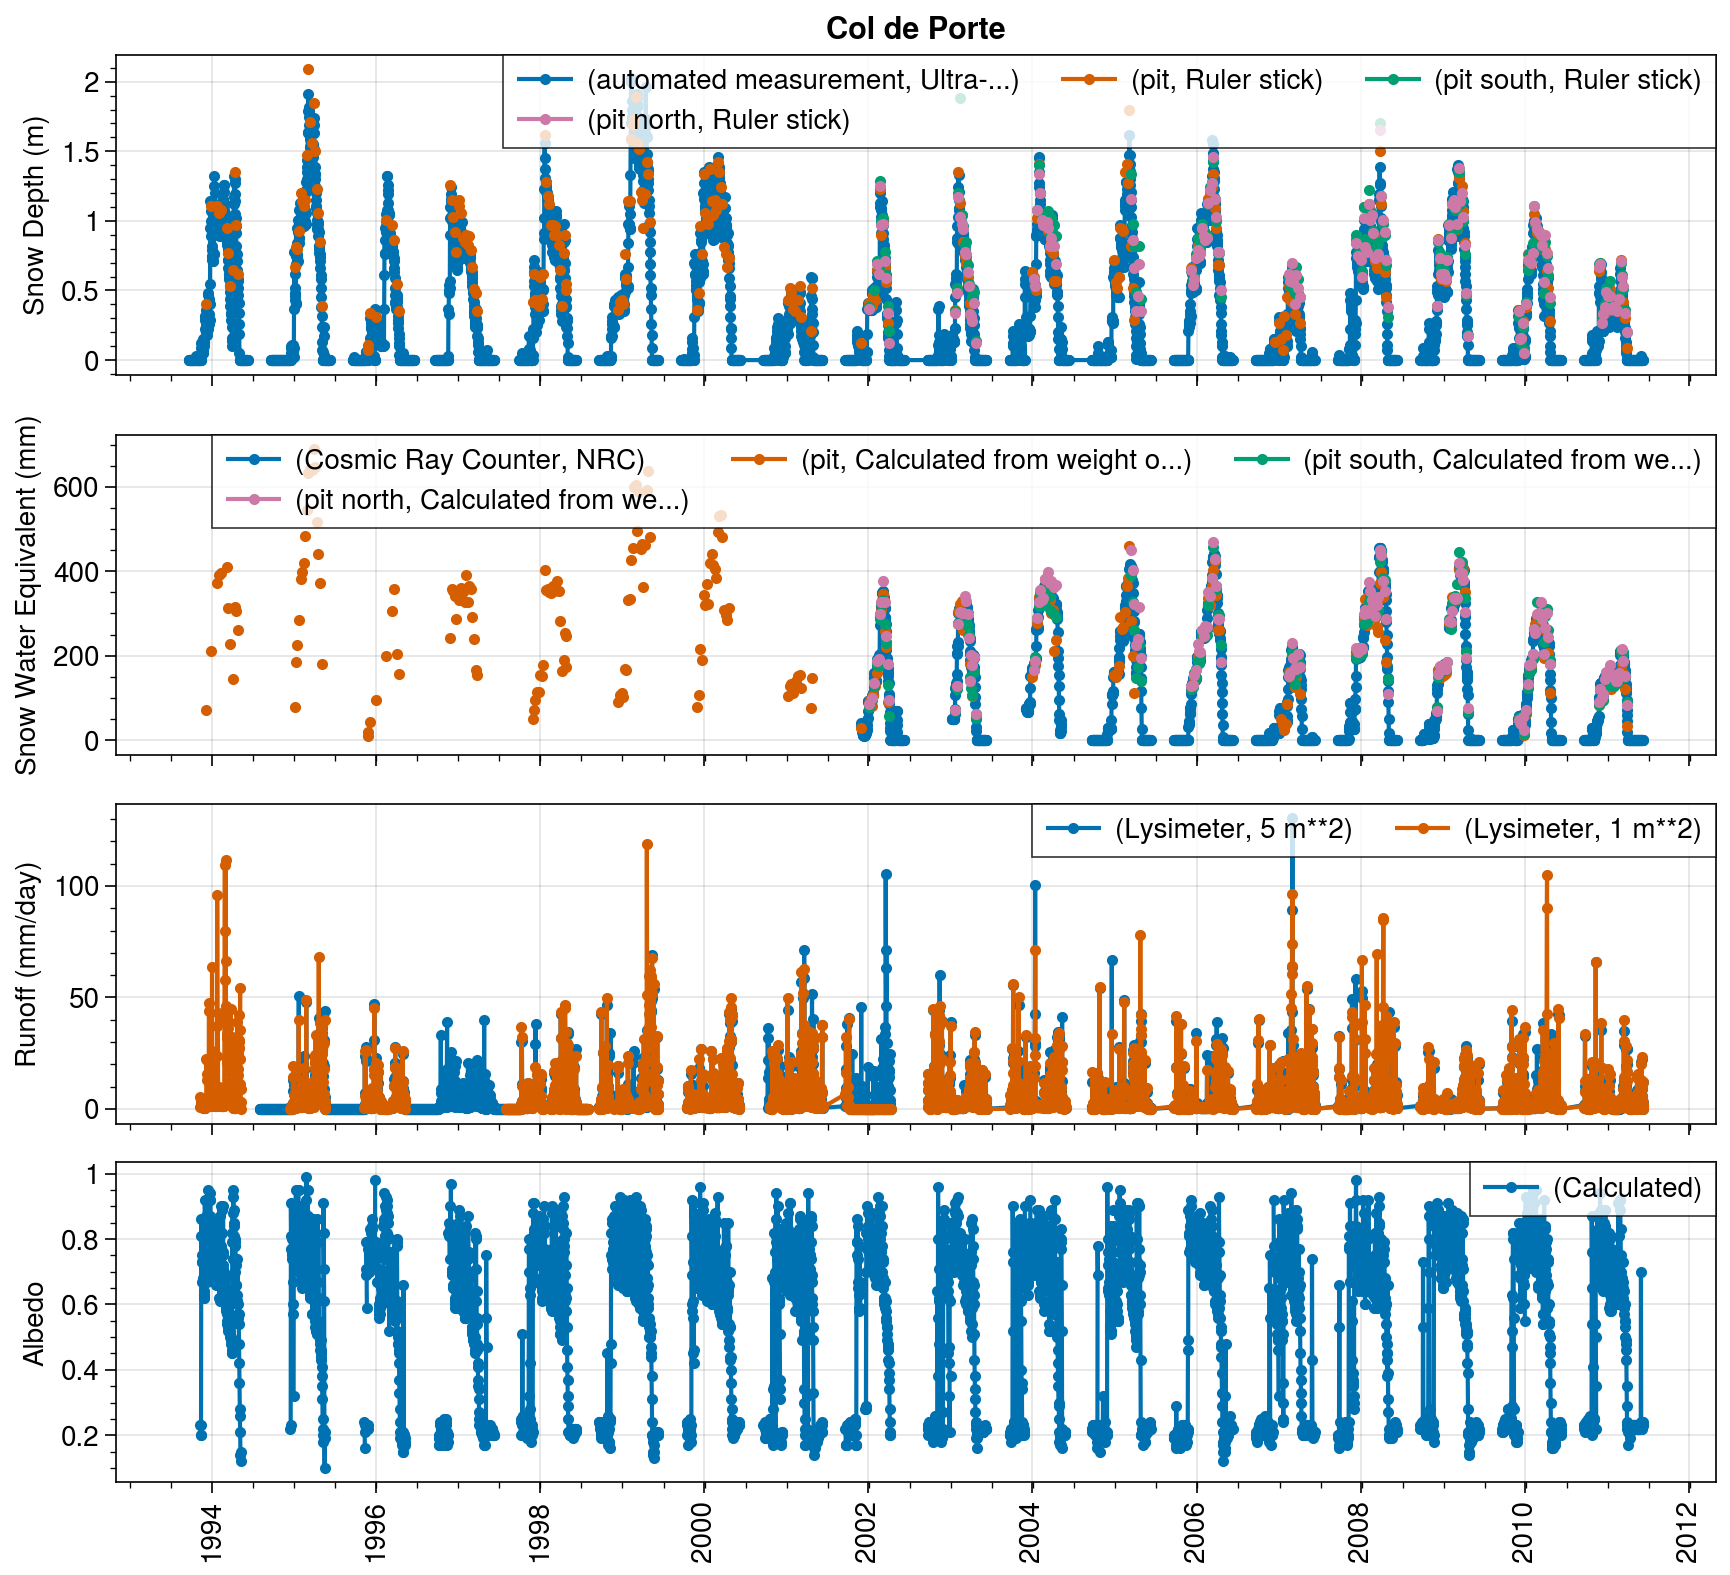

In [177]:
fig, axs = plot.subplots(ncols=1, nrows=4, aspect=5, axwidth=8, sharey=0)

for var in list(ds_d_eval_morin2012.keys())[0:4]: axs[0].plot(ds_d_eval_morin2012[var], marker='.', labels=var[15:])
axs[0].format(ylabel='Snow Depth (m)')

for var in list(ds_d_eval_morin2012.keys())[4:8]: axs[1].plot(ds_d_eval_morin2012[var], marker='.', labels=var[14:])
axs[1].format(ylabel='Snow Water Equivalent (mm)')

for var in list(ds_d_eval_morin2012.keys())[8:10]: axs[2].plot(ds_d_eval_morin2012[var], marker='.', labels=var[21:])
axs[2].format(ylabel='Runoff (mm/day)')

for var in list(ds_d_eval_morin2012.keys())[10:]: axs[3].plot(ds_d_eval_morin2012[var], marker='.', labels=var[11:])
axs[3].format(ylabel='Albedo')

for ax in axs: ax.legend(loc='ur')

fig.suptitle('Col de Porte')

Text(0.5, 0.98, 'Col de Porte')

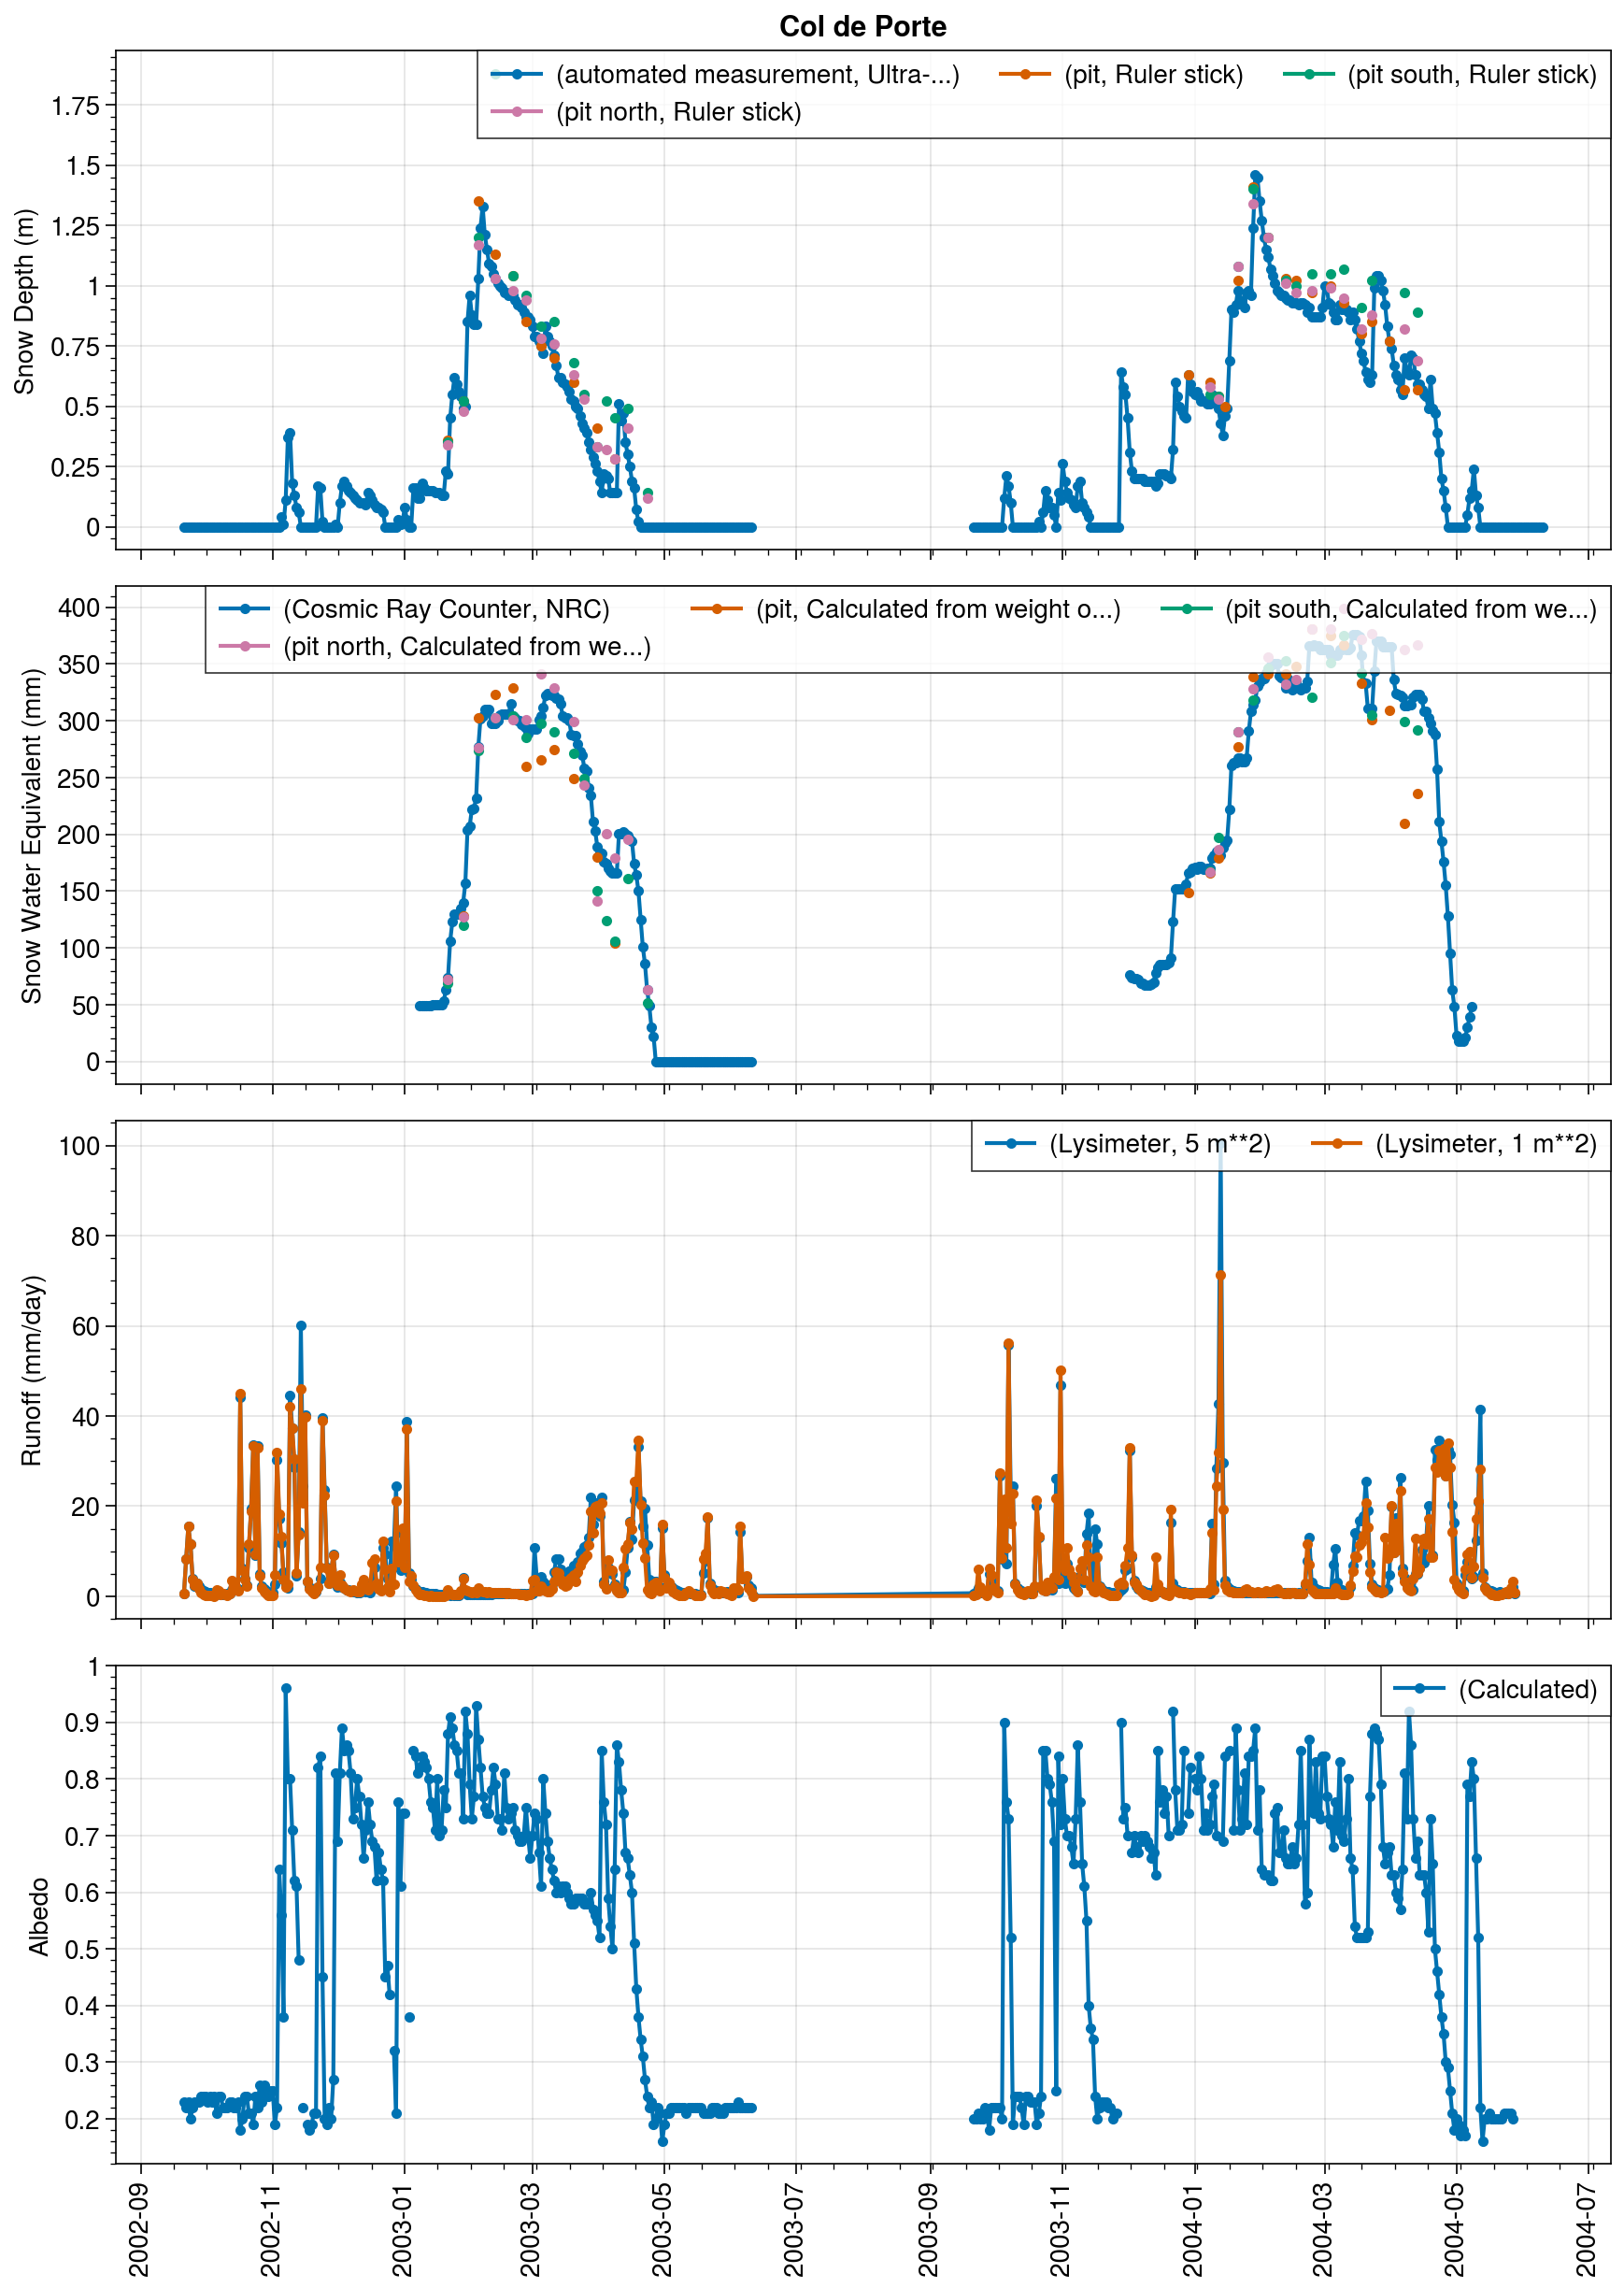

In [178]:
fig, axs = plot.subplots(ncols=1, nrows=4, aspect=3, axwidth=8, sharey=0)

start = '2002-09'
end = '2004-07'

for var in list(ds_d_eval_morin2012.keys())[0:4]: axs[0].plot(ds_d_eval_morin2012[var].sel(time=slice(start,end)), marker='.', labels=var[15:])
axs[0].format(ylabel='Snow Depth (m)')

for var in list(ds_d_eval_morin2012.keys())[4:8]: axs[1].plot(ds_d_eval_morin2012[var].sel(time=slice(start,end)), marker='.', labels=var[14:])
axs[1].format(ylabel='Snow Water Equivalent (mm)')

for var in list(ds_d_eval_morin2012.keys())[8:10]: axs[2].plot(ds_d_eval_morin2012[var].sel(time=slice(start,end)), marker='.', labels=var[21:])
axs[2].format(ylabel='Runoff (mm/day)')

for var in list(ds_d_eval_morin2012.keys())[10:]: axs[3].plot(ds_d_eval_morin2012[var].sel(time=slice(start,end)), marker='.', labels=var[11:])
axs[3].format(ylabel='Albedo')

for ax in axs: ax.legend(loc='ur')

fig.suptitle('Col de Porte')

## Hourly eval

In [180]:
df_h_eval_morin2012 = pd.read_csv(path_morin2012+'/CDP_hor_eval.tab', skiprows=20, delimiter='\t', infer_datetime_format=True, index_col=0)
df_h_eval_morin2012.index = pd.to_datetime(df_h_eval_morin2012.index)
ds_h_eval_morin2012 = df_h_eval_morin2012.to_xarray()
ds_h_eval_morin2012 = ds_h_eval_morin2012.rename({'Date/Time': 'time'})
ds_h_eval_morin2012

<xarray.Dataset>
Dimensions:                                                       (time: 119109)
Coordinates:
  * time                                                          (time) datetime64[ns] ...
Data variables:
    Snow thick [m] (automated measurement, Ultra-...)             (time) float64 ...
    t [°C] (at snow surface, upward IR ra...)                     (time) float64 ...
    Runoff [kg/m**2/day] (Lysimeter, 1 m**2)                      (time) float64 ...
    Runoff [kg/m**2/day] (Lysimeter, 5 m**2)                      (time) float64 ...
    Ground heat flux [W/m**2] (replicate 1, Heat-flux plate,...)  (time) float64 ...
    Ground heat flux [W/m**2] (replicate 2, Heat-flux plate,...)  (time) float64 ...
    Ground heat flux [W/m**2] (replicate 3, Heat-flux plate,...)  (time) float64 ...
    Albedo [%] (Calculated)                                       (time) float64 ...

/home/lalandmi/miniconda3/envs/phd_v3/lib/python3.8/site-packages/xarray/core/common.py:1123: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  grouper = pd.Grouper(


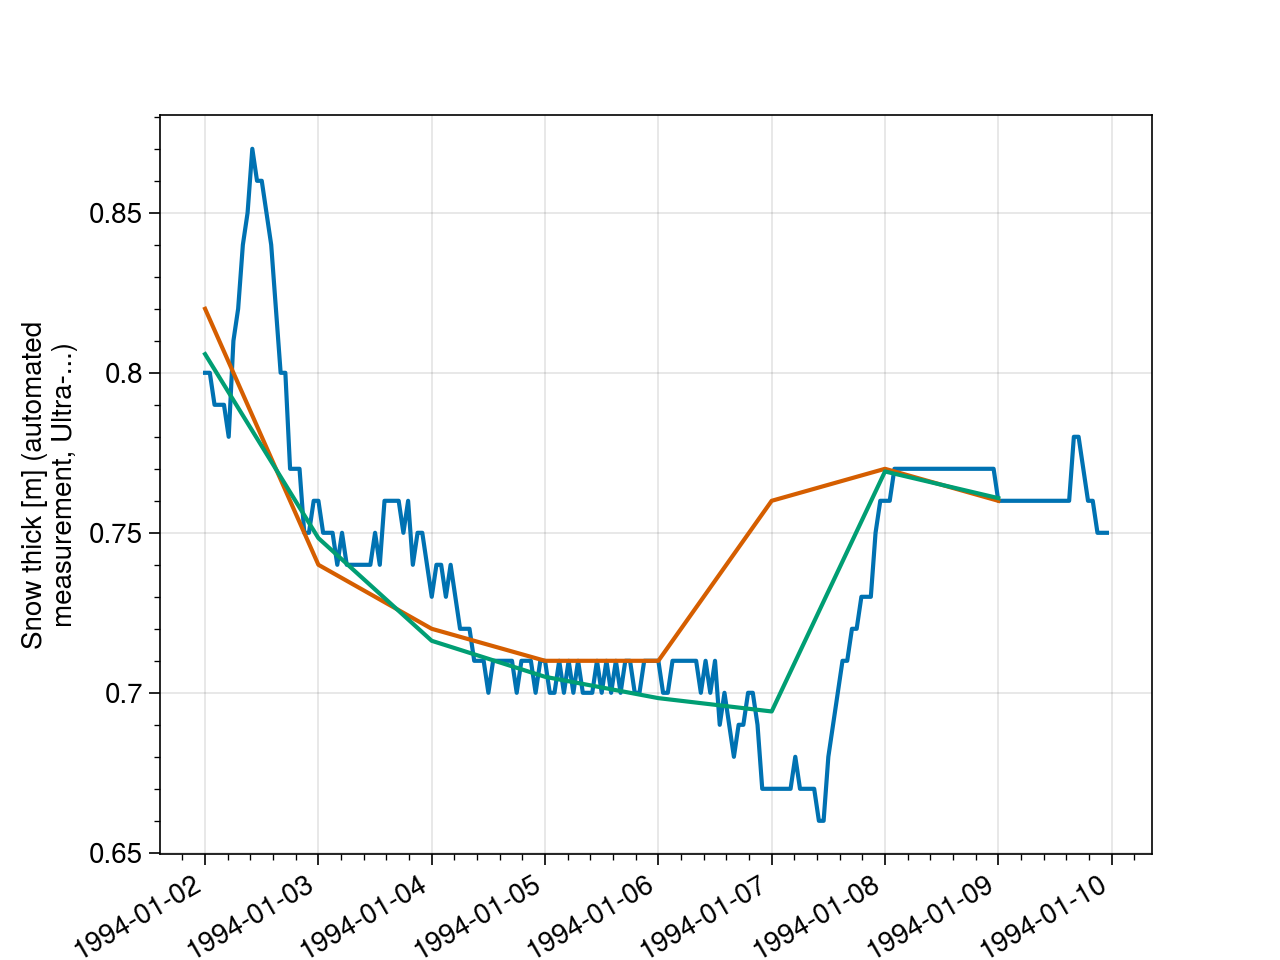

In [181]:
ds_h_eval_morin2012['Snow thick [m] (automated measurement, Ultra-...)'].sel(time=slice('1994-01-02','1994-01-09')).plot()
ds_d_eval_morin2012['Snow thick [m] (automated measurement, Ultra-...)'].sel(time=slice('1994-01-02','1994-01-09')).plot()
ds_h_eval_morin2012['Snow thick [m] (automated measurement, Ultra-...)'].sel(time=slice('1994-01-02','1994-01-09')).resample(time='D').mean().plot()

## Hourly disk

In [182]:
df_h_disk_morin2012 = pd.read_csv(path_morin2012+'/CDP_hor_disk.tab', skiprows=35, delimiter='\t', infer_datetime_format=True, index_col=0)
df_h_disk_morin2012.index = pd.to_datetime(df_h_disk_morin2012.index)
ds_h_disk_morin2012 = df_h_disk_morin2012.to_xarray()
ds_h_disk_morin2012 = ds_h_disk_morin2012.rename({'Date/Time': 'time'})
ds_h_disk_morin2012

<xarray.Dataset>
Dimensions:                                            (time: 103632)
Coordinates:
  * time                                               (time) datetime64[ns] ...
Data variables:
    Snow thick [m] (pit, automated measurement, U...)  (time) float64 0.0 ......
    SDH [m] (settling disk 1, Settling disk)           (time) float64 nan ......
    SDH [m] (settling disk 2, Settling disk)           (time) float64 nan ......
    SDH [m] (settling disk 3, Settling disk)           (time) float64 nan ......
    SDH [m] (settling disk 4, Settling disk)           (time) float64 nan ......
    SDH [m] (settling disk 5, Settling disk)           (time) float64 nan ......
    SDH [m] (settling disk 6, Settling disk)           (time) float64 nan ......
    SDH [m] (settling disk 7, Settling disk)           (time) float64 nan ......
    SDH [m] (settling disk 8, Settling disk)           (time) float64 nan ......
    SDH [m] (settling disk 9, Settling disk)           (time) float64 nan ......
    SDH [m] (settling disk 10, Settling disk)          (time) float64 nan ......
    SDH [m] (settling disk 11, Settling disk)          (time) float64 nan ......
    t [°C] (attached to settling disk 1, ...)          (time) float64 nan ......
    t [°C] (attached to settling disk 2, ...)          (time) float64 nan ......
    t [°C] (attached to settling disk 3, ...)          (time) float64 nan ......
    t [°C] (attached to settling disk 4, ...)          (time) float64 nan ......
    t [°C] (attached to settling disk 5, ...)          (time) float64 nan ......
    t [°C] (attached to settling disk 6, ...)          (time) float64 nan ......
    t [°C] (attached to settling disk 7, ...)          (time) float64 nan ......
    t [°C] (attached to settling disk 8, ...)          (time) float64 nan ......
    t [°C] (attached to settling disk 9, ...)          (time) float64 nan ......
    t [°C] (attached to settling disk 10,...)          (time) float64 nan ......
    t [°C] (attached to settling disk 11,...)          (time) float64 nan ......

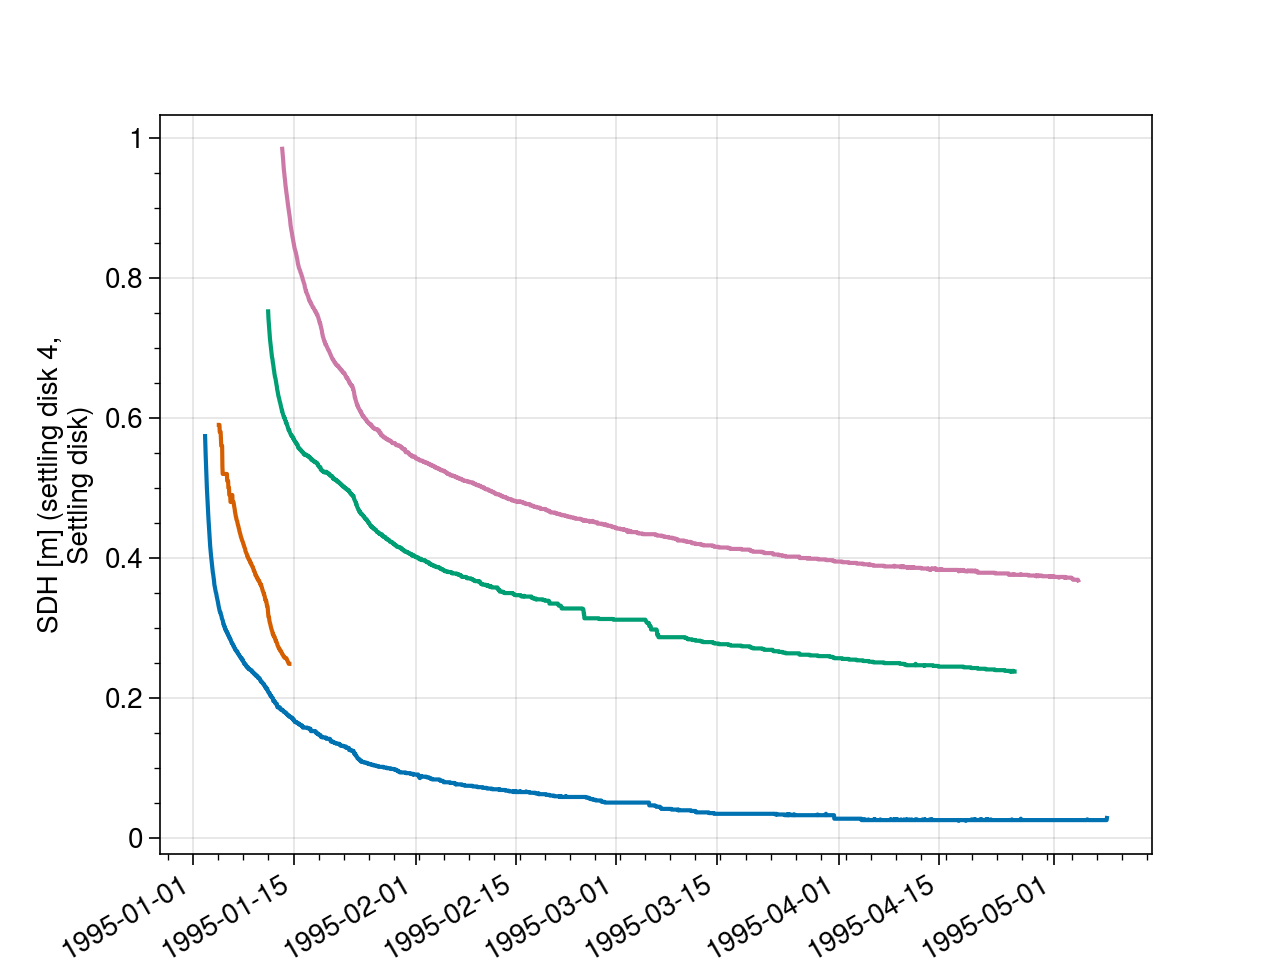

In [183]:
ds_h_disk_morin2012['SDH [m] (settling disk 1, Settling disk)'].sel(time=slice('1995-01','1995-05')).plot()
ds_h_disk_morin2012['SDH [m] (settling disk 2, Settling disk)'].sel(time=slice('1995-01','1995-05')).plot()
ds_h_disk_morin2012['SDH [m] (settling disk 3, Settling disk)'].sel(time=slice('1995-01','1995-05')).plot()
ds_h_disk_morin2012['SDH [m] (settling disk 4, Settling disk)'].sel(time=slice('1995-01','1995-05')).plot()

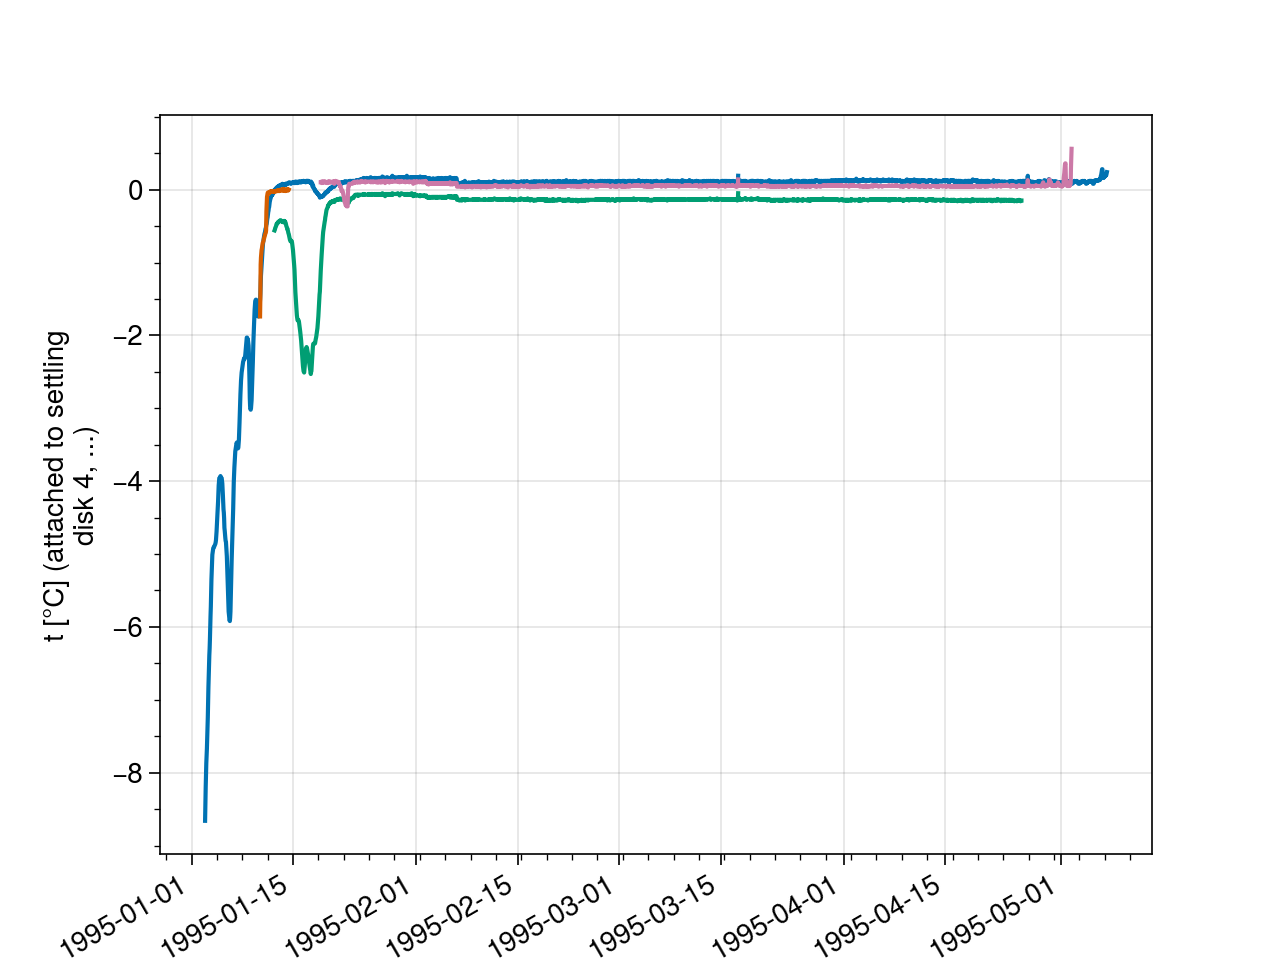

In [184]:
ds_h_disk_morin2012['t [°C] (attached to settling disk 1, ...)'].sel(time=slice('1995-01','1995-05')).plot()
ds_h_disk_morin2012['t [°C] (attached to settling disk 2, ...)'].sel(time=slice('1995-01','1995-05')).plot()
ds_h_disk_morin2012['t [°C] (attached to settling disk 3, ...)'].sel(time=slice('1995-01','1995-05')).plot()
ds_h_disk_morin2012['t [°C] (attached to settling disk 4, ...)'].sel(time=slice('1995-01','1995-05')).plot()


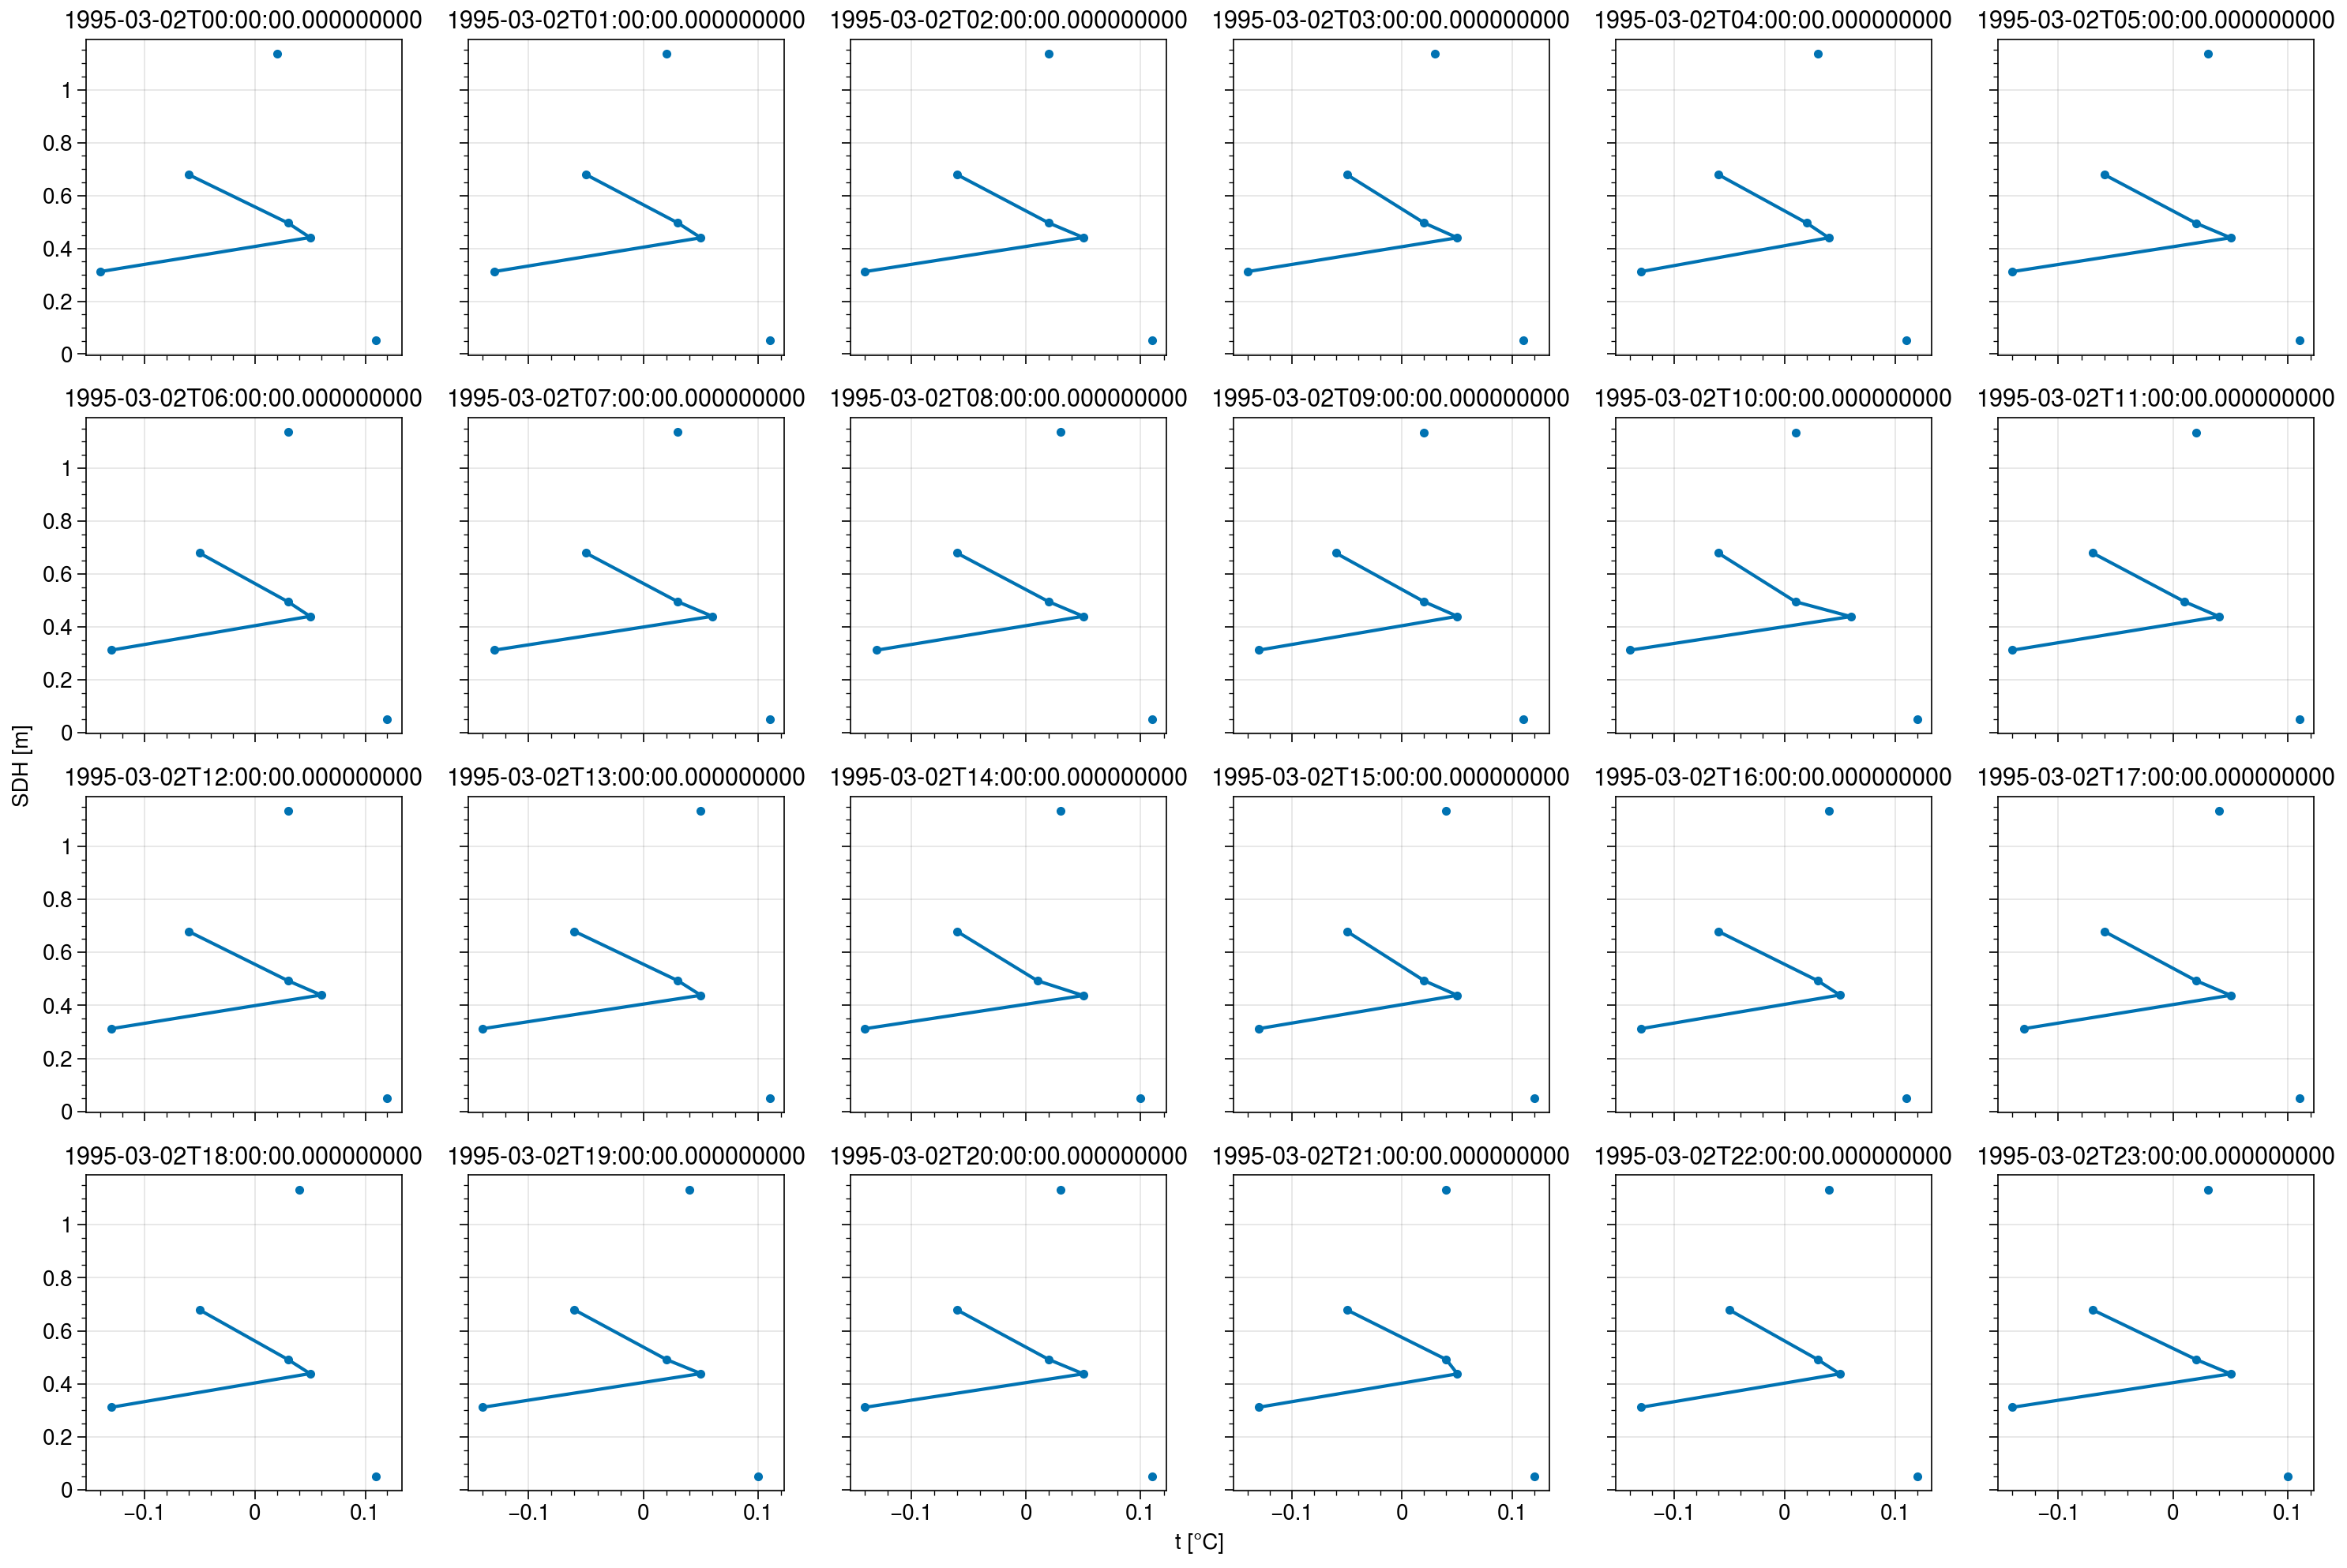

In [194]:
fig, axs = plot.subplots(nrows=4, ncols=6, axwidth=2)

date = '1995-03-02'

for i, ax in enumerate(axs):
    ax.plot([ds_h['t [°C] (attached to settling disk '+str(k)+', ...)'].sel(time=date)[i] for k in plot.arange(1,9)], 
            [ds_h['SDH [m] (settling disk '+str(k)+', Settling disk)'].sel(time=date)[i] for k in plot.arange(1,9)],
        marker='.'
    )

    ax.format(
        xlabel='t [°C]', ylabel='SDH [m]', title=ds_h['t [°C] (attached to settling disk 1, ...)'].sel(time=date)[i].time.values
    )

## Soil temp

In [218]:
df_h_soilt_morin2012 = pd.read_csv(path_morin2012+'/CDP_soil_temp.tab', skiprows=14, delimiter='\t', infer_datetime_format=True, index_col=0)
arrays = [pd.to_datetime(df_h_soilt_morin2012.index), df_h_soilt_morin2012['Depth sed [m]'].values]
tuples = list(zip(*arrays))
df_h_soilt_morin2012.index = pd.MultiIndex.from_tuples(tuples, names=['time', 'depth'])
df_h_soilt_morin2012 = df_h_soilt_morin2012.drop(columns='Depth sed [m]')
ds_h_soilt_morin2012 = df_h_soilt_morin2012.to_xarray()
ds_h_soilt_morin2012

<xarray.Dataset>
Dimensions:  (depth: 3, time: 97701)
Coordinates:
  * time     (time) datetime64[ns] 1993-11-10 1993-11-10T01:00:00 ... 2011-06-12
  * depth    (depth) float64 0.1 0.2 0.5
Data variables:
    t [°C]   (time, depth) float64 5.06 5.88 6.63 4.98 ... 13.22 13.16 12.07

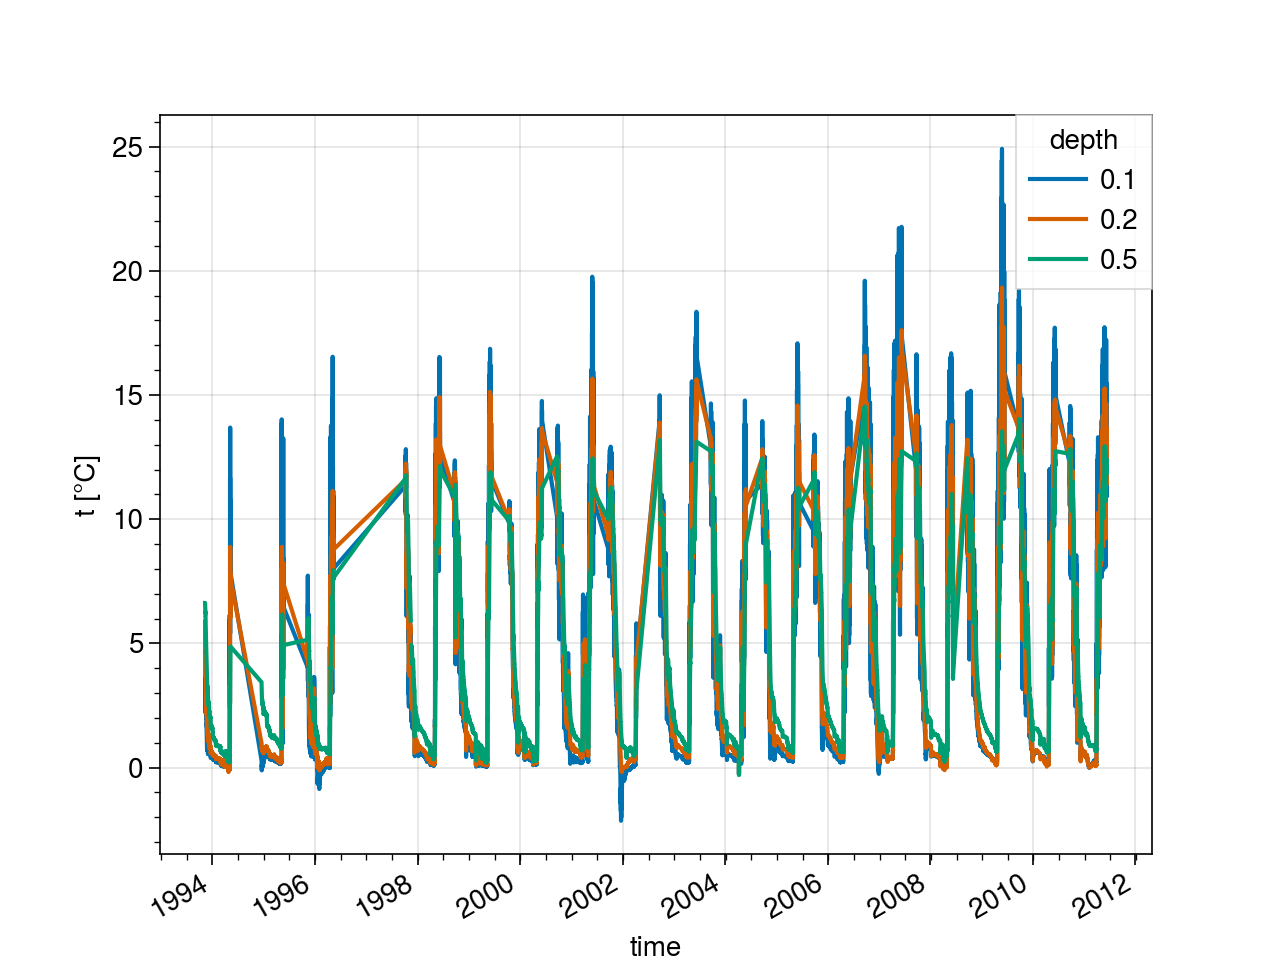

In [221]:
ds_h_soilt_morin2012['t [°C]'].plot(hue='depth')

# Menard2019

## Snow Depth

In [227]:
df_h_eval_menard2019 = xr.open_dataset(path_menard2019+'/obs_insitu_cdp_1994_2014.nc')
df_h_eval_menard2019

<xarray.Dataset>
Dimensions:   (sdepth: 3, time: 175320)
Coordinates:
  * time      (time) datetime64[ns] 1994-10-01T01:00:00 ... 2014-10-01
  * sdepth    (sdepth) float32 0.1 0.2 0.5
Data variables:
    albs      (time) float32 ...
    snd_auto  (time) float32 ...
    snd_man   (time) float32 ...
    snw_auto  (time) float32 ...
    snw_man   (time) float32 ...
    ts        (time) float32 ...
    tsl       (time, sdepth) float32 ...

/home/lalandmi/miniconda3/envs/phd_v3/lib/python3.8/site-packages/xarray/core/common.py:1123: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  grouper = pd.Grouper(
/home/lalandmi/miniconda3/envs/phd_v3/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


(<matplotlib.lines.Line2D at 0x151178991c40>,)

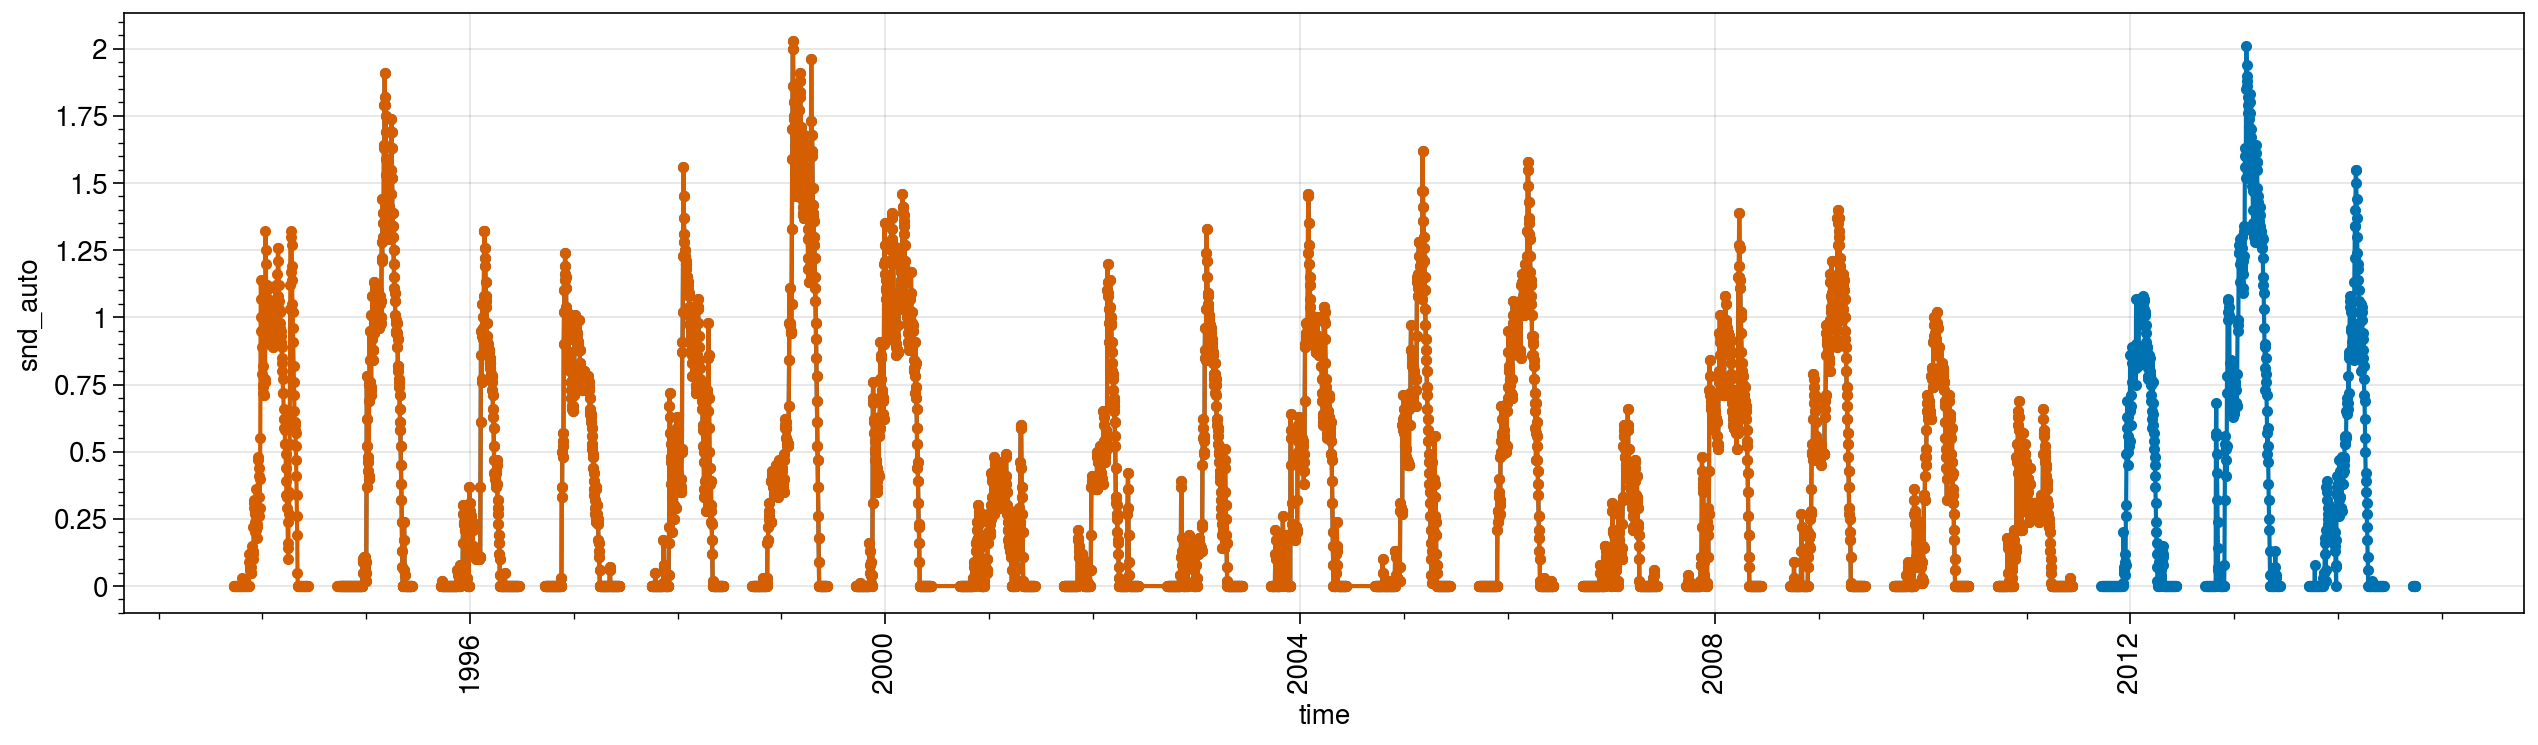

In [257]:
fig, axs = plot.subplots(ncols=1, nrows=1, aspect=4, axwidth=12, sharey=0)

axs[0].plot(df_h_eval_menard2019.snd_auto.resample(time='D').mean(), marker='.')
axs[0].plot(ds_d_eval_morin2012['Snow thick [m] (automated measurement, Ultra-...)'], marker='.')

/home/lalandmi/miniconda3/envs/phd_v3/lib/python3.8/site-packages/xarray/core/common.py:1123: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  grouper = pd.Grouper(
/home/lalandmi/miniconda3/envs/phd_v3/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


(<matplotlib.lines.Line2D at 0x1511787f15b0>,)

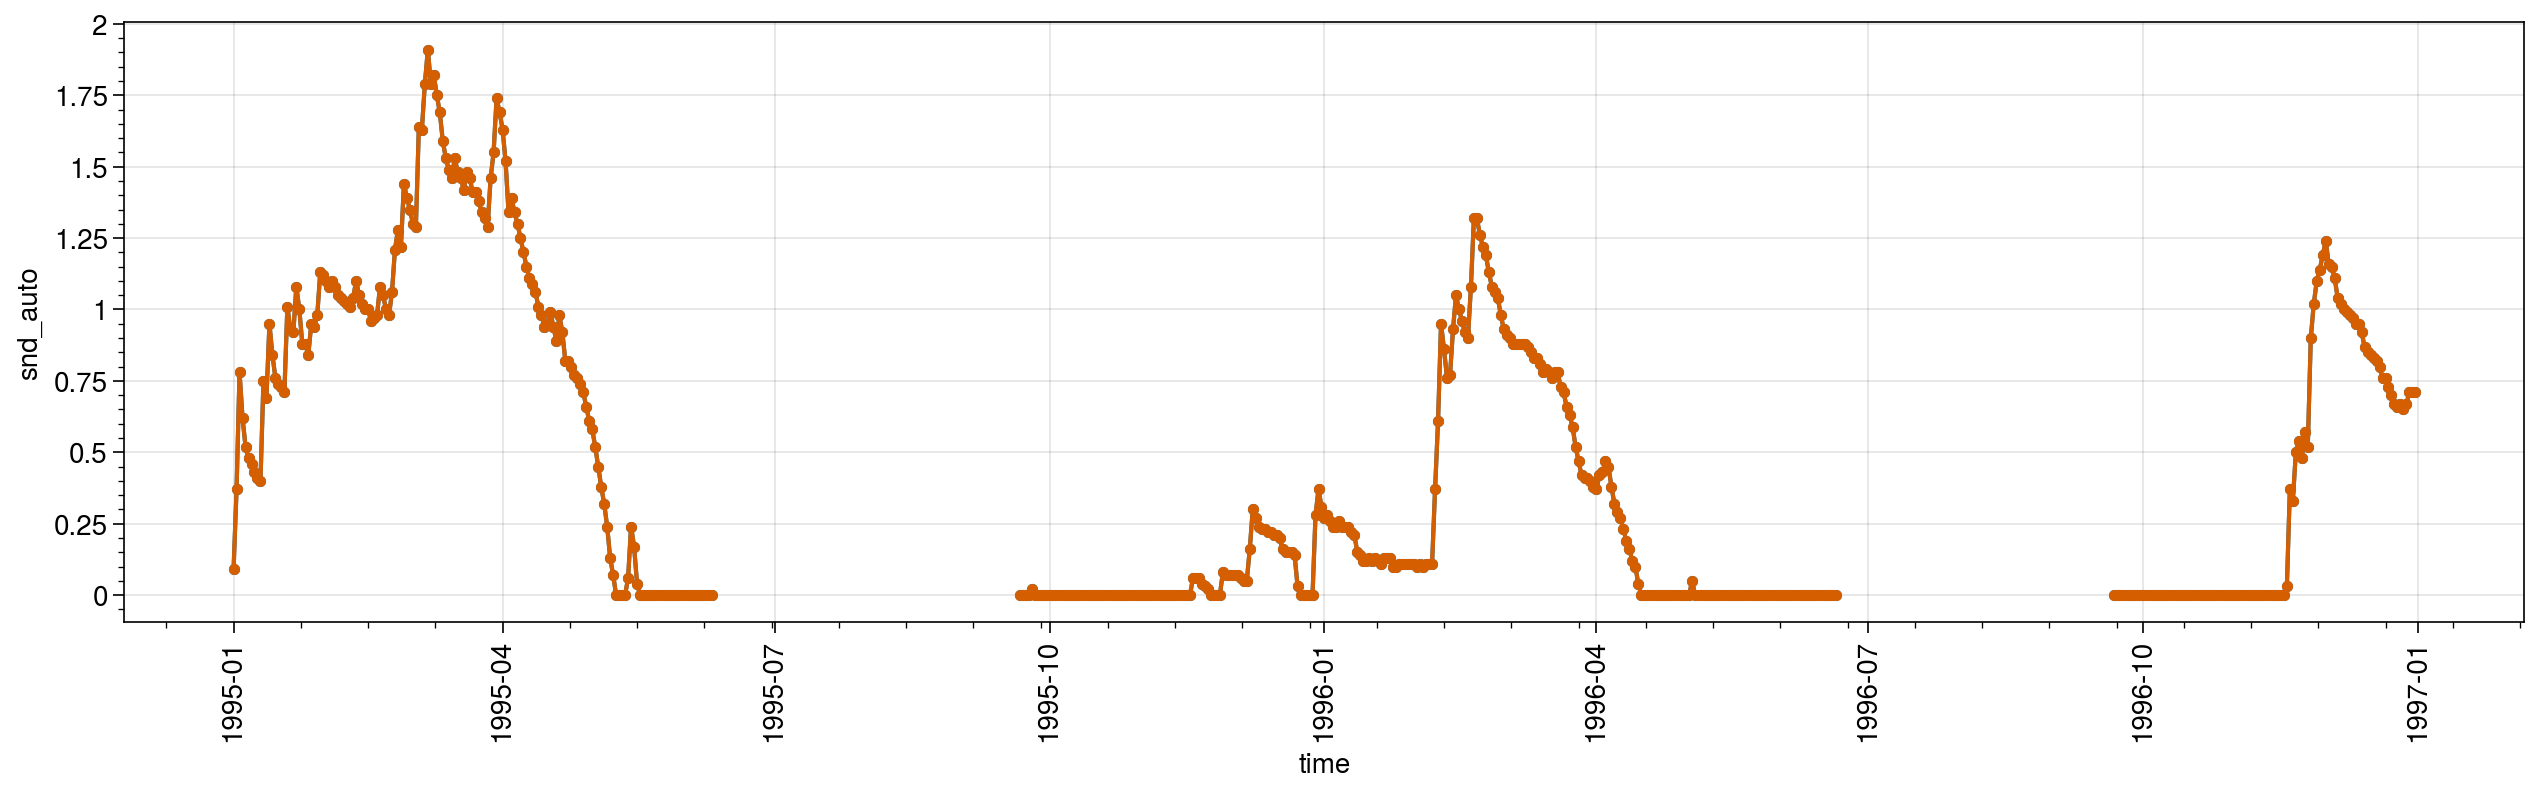

In [258]:
fig, axs = plot.subplots(ncols=1, nrows=1, aspect=4, axwidth=12, sharey=0)

period=slice('1995','1996')

axs[0].plot(df_h_eval_menard2019.snd_auto.sel(time=period).resample(time='D').mean(), marker='.')
axs[0].plot(ds_d_eval_morin2012['Snow thick [m] (automated measurement, Ultra-...)'].sel(time=period), marker='.')

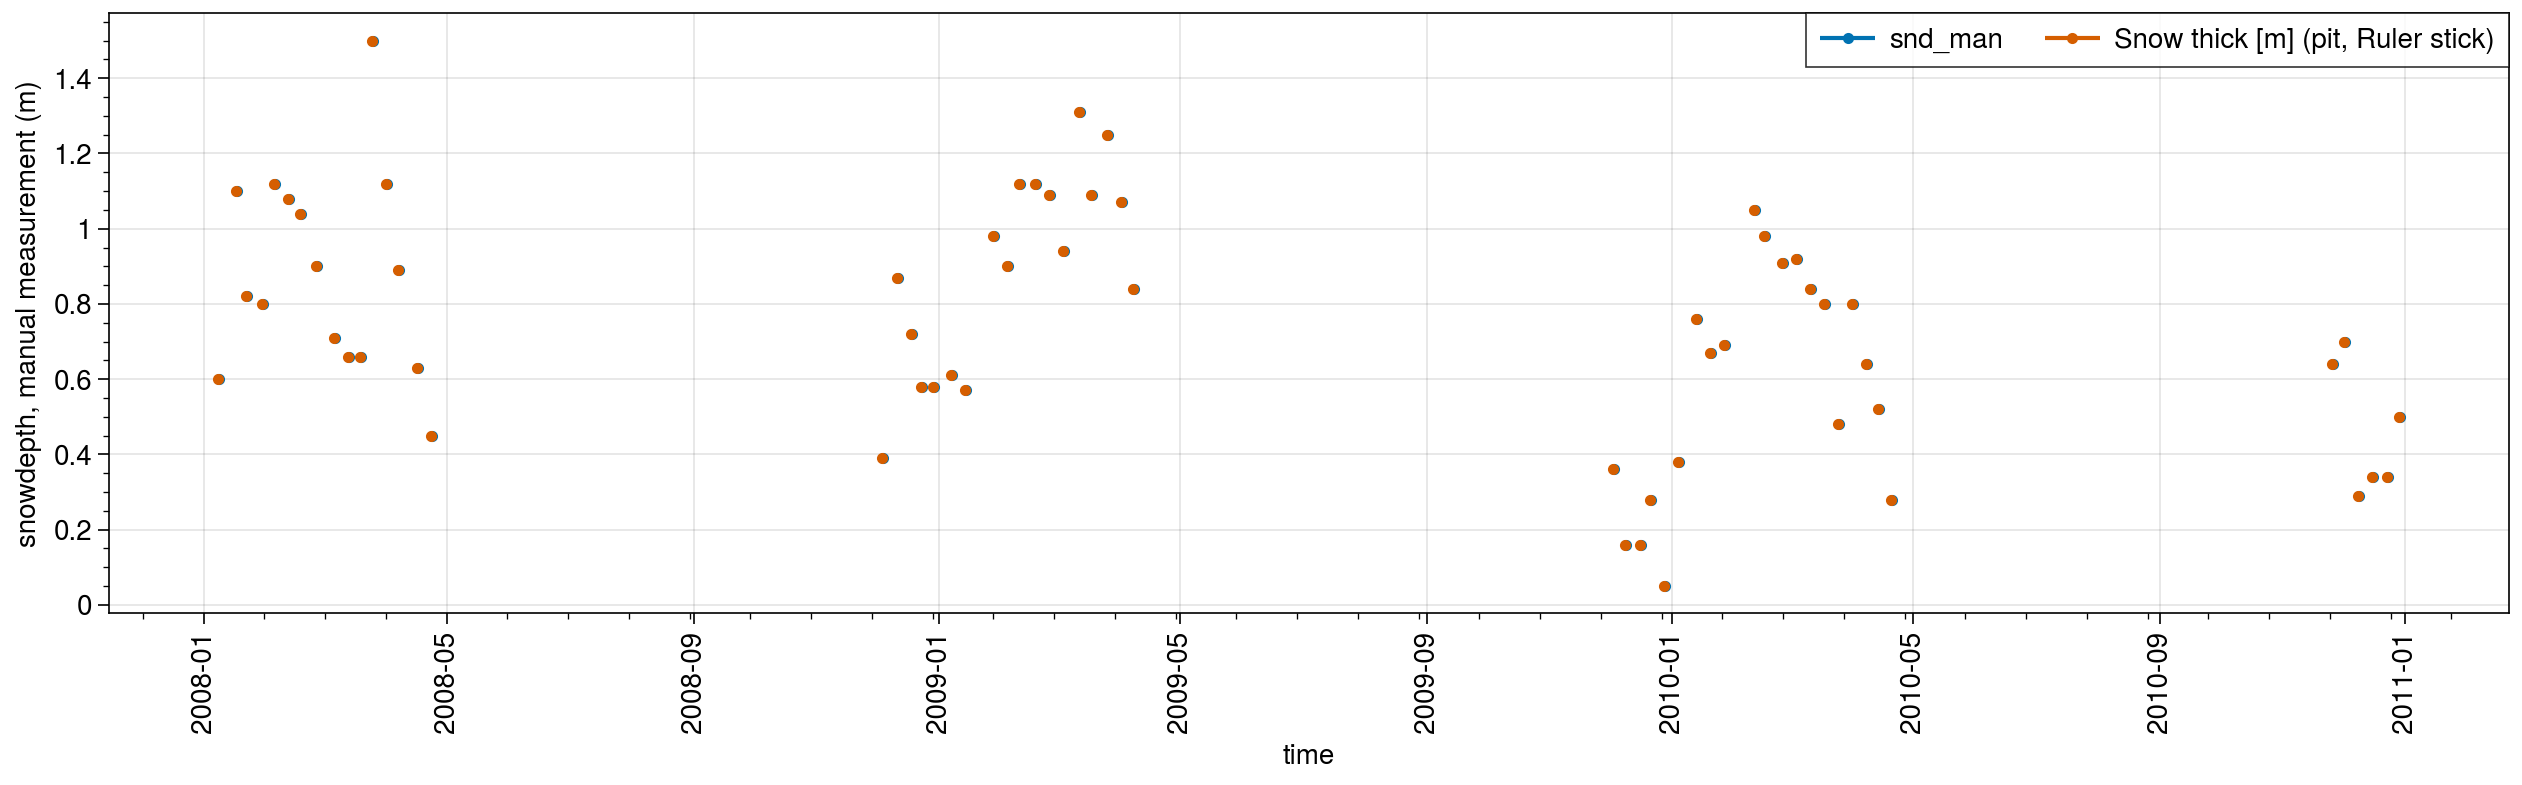

In [260]:
fig, axs = plot.subplots(ncols=1, nrows=1, aspect=4, axwidth=12, sharey=0)

period=slice('2008','2010')

axs[0].plot(df_h_eval_menard2019.snd_man.sel(time=period), marker='.', label='snd_man')
# axs[0].plot(ds_d_eval_morin2012['Snow thick [m] (pit north, Ruler stick)'].sel(time=period), marker='.', label='Snow thick [m] (pit north, Ruler stick)')
# axs[0].plot(ds_d_eval_morin2012['Snow thick [m] (pit south, Ruler stick)'].sel(time=period), marker='.', label='Snow thick [m] (pit south, Ruler stick)')
axs[0].plot(ds_d_eval_morin2012['Snow thick [m] (pit, Ruler stick)'].sel(time=period), marker='.', label='Snow thick [m] (pit, Ruler stick)')

axs[0].legend()

<mark>/!\ Menard et al. (2019) does not take into account the snow pit south and north. /!\ </mark>

## SWE

(<matplotlib.lines.Line2D at 0x1511783c7c70>,)

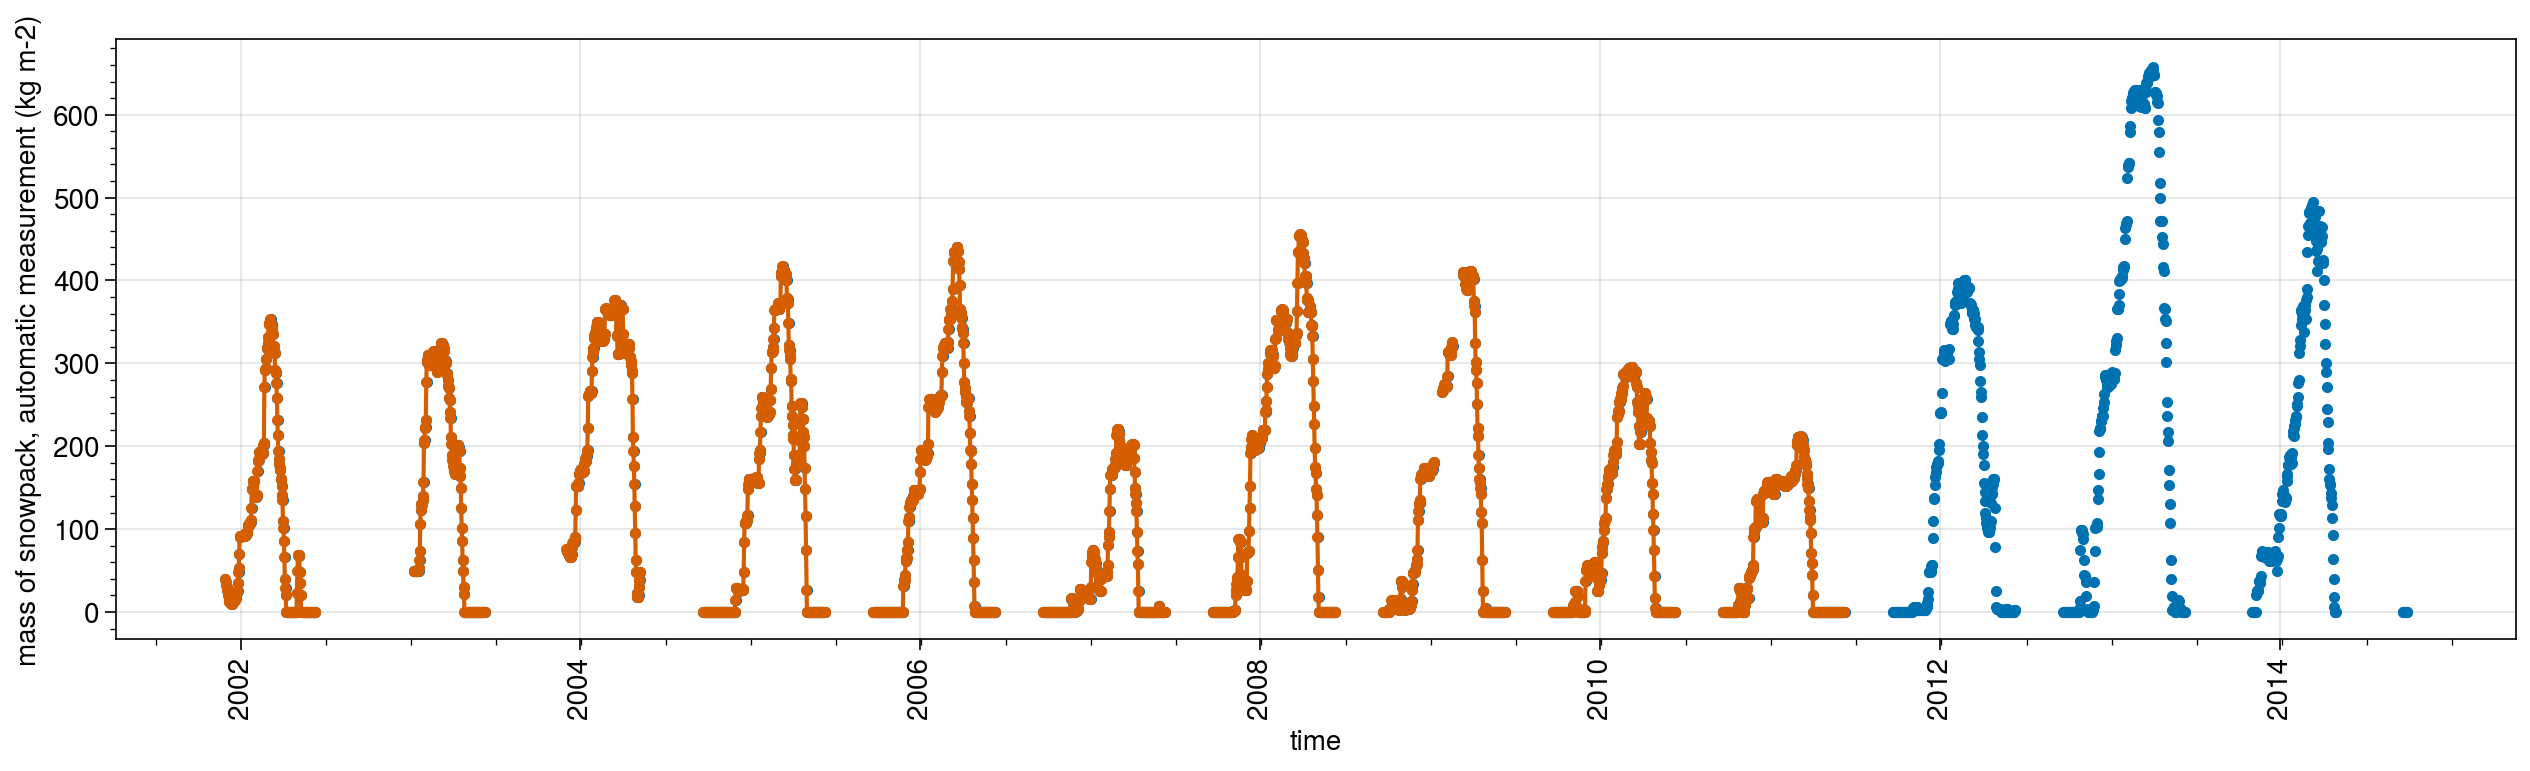

In [261]:
fig, axs = plot.subplots(ncols=1, nrows=1, aspect=4, axwidth=12, sharey=0)

axs[0].plot(df_h_eval_menard2019.snw_auto, marker='.')
axs[0].plot(ds_d_eval_morin2012['SWE [kg/m**2] (Cosmic Ray Counter, NRC)'], marker='.')

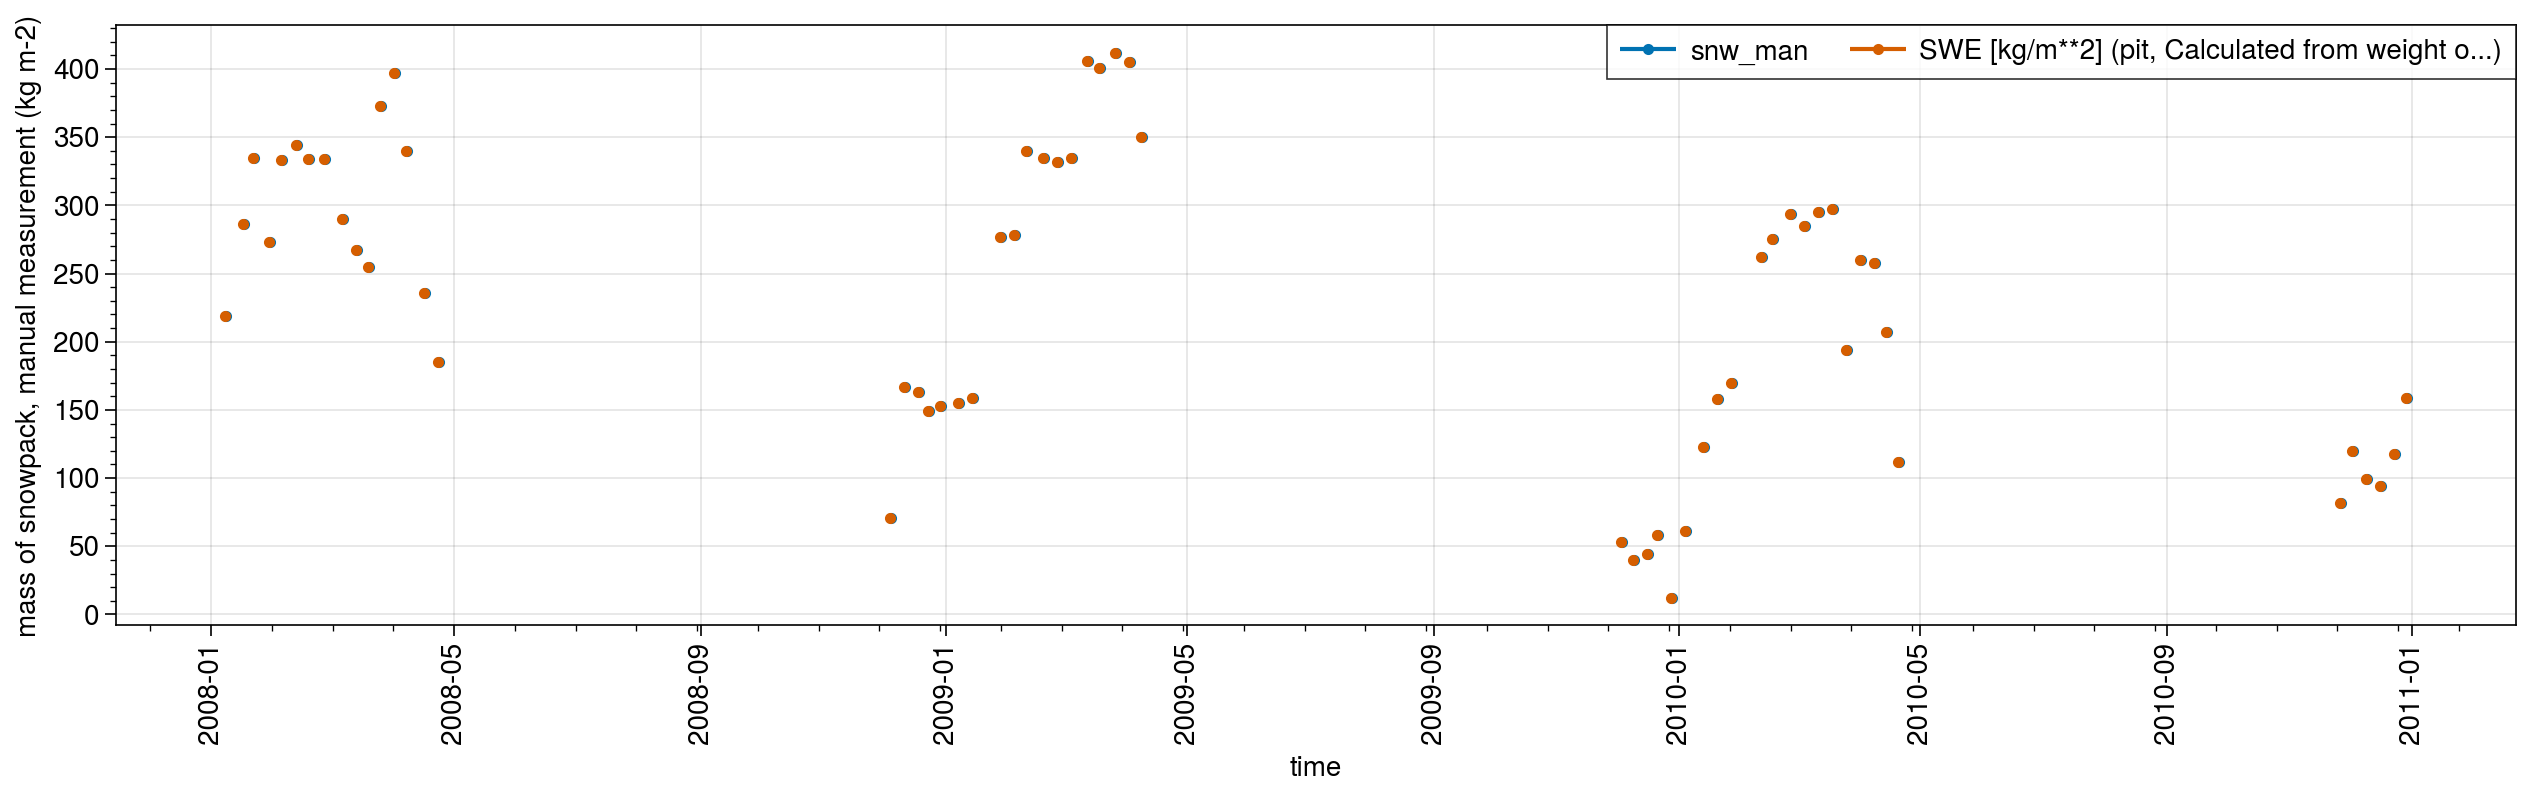

In [267]:
fig, axs = plot.subplots(ncols=1, nrows=1, aspect=4, axwidth=12, sharey=0)

period=slice('2008','2010')

axs[0].plot(df_h_eval_menard2019.snw_man.sel(time=period), marker='.', label='snw_man')
axs[0].plot(ds_d_eval_morin2012['SWE [kg/m**2] (pit, Calculated from weight o...)'].sel(time=period), marker='.', label='SWE [kg/m**2] (pit, Calculated from weight o...)')
# axs[0].plot(ds_d_eval_morin2012['SWE [kg/m**2] (pit north, Calculated from we...)'].sel(time=period), marker='.', label='SWE [kg/m**2] (pit, Calculated from weight o...)')
# axs[0].plot(ds_d_eval_morin2012['SWE [kg/m**2] (pit south, Calculated from we...)'].sel(time=period), marker='.', label='SWE [kg/m**2] (pit, Calculated from weight o...)')

axs[0].legend()

## Surface temperature

Surface temperature (Fig. 8a) and soil temperatures (Fig. 8b) are available at eight of the sites. Surface temperature was calculated from measured outgoing longwave radiation assuming black body radiation except at the Senator Beck basin sites, where infrared temperature sensors are used. The pyranometers measuring outgoing longwave radiation are above the snow cover at Col de Porte, Sapporo, and Weissfluhjoch and above the canopy at BERMS.

(<matplotlib.lines.Line2D at 0x151177a4c370>,)

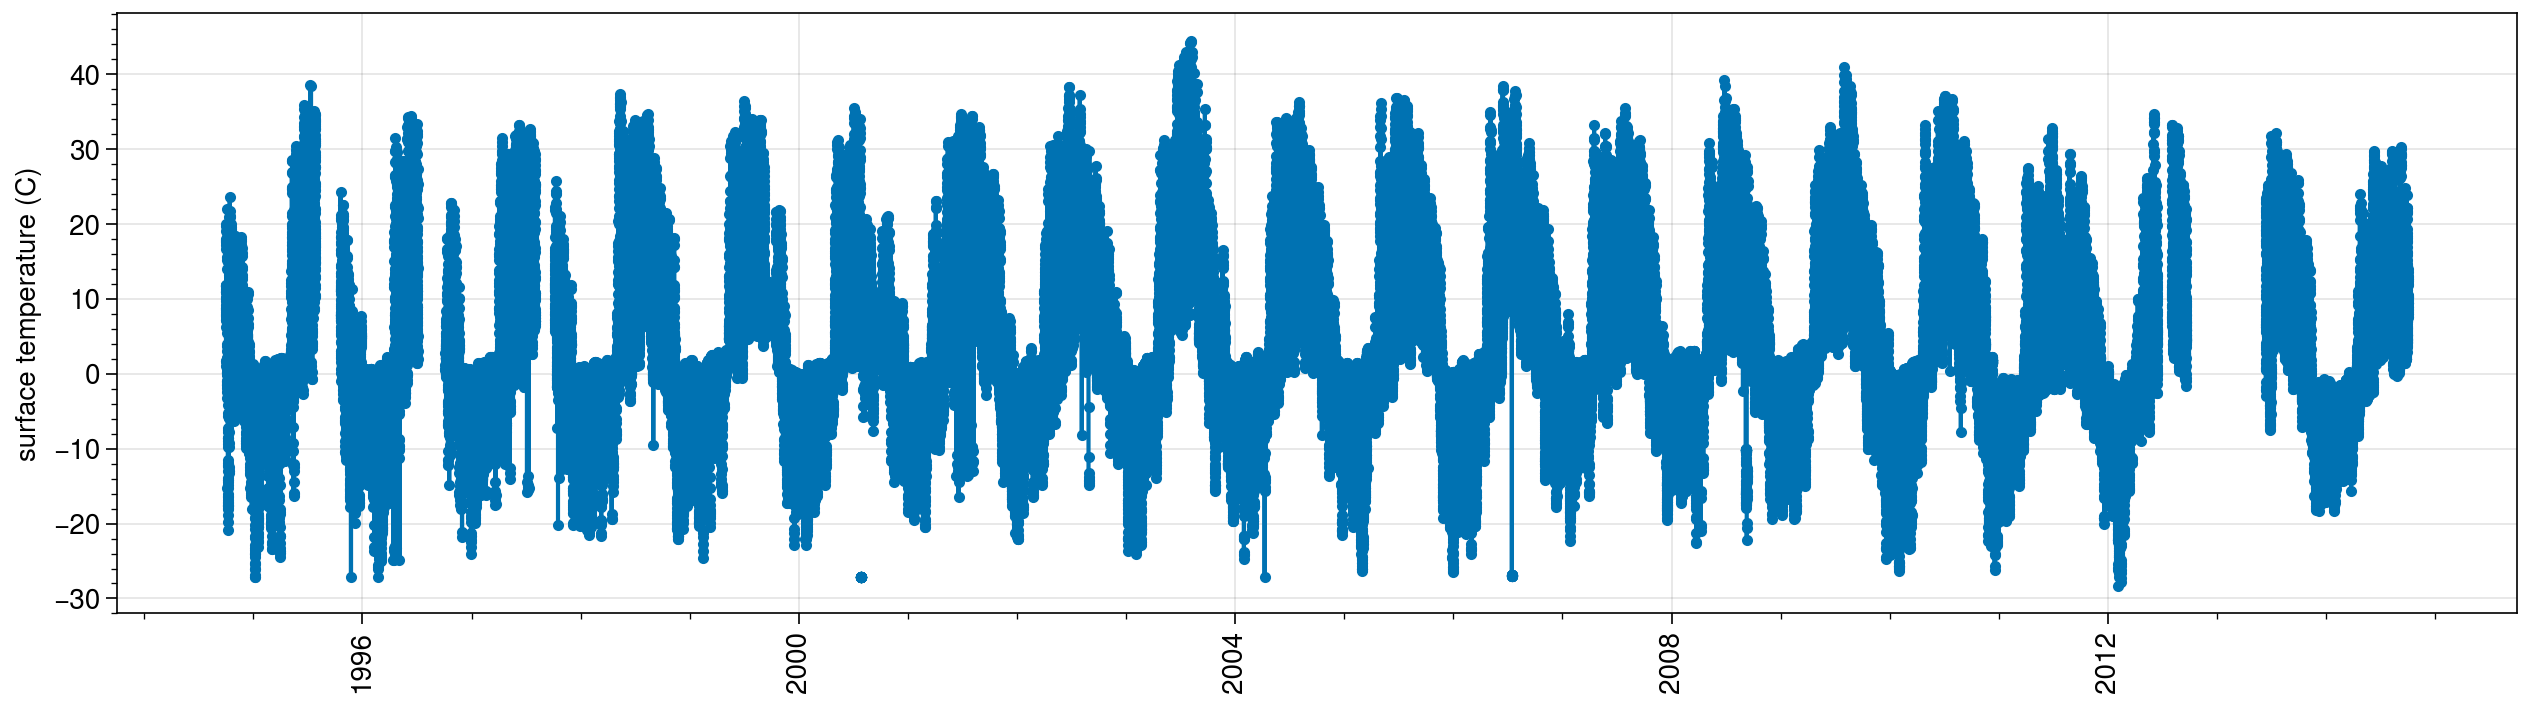

In [269]:
fig, axs = plot.subplots(ncols=1, nrows=1, aspect=4, axwidth=12, sharey=0)

axs[0].plot(df_h_eval_menard2019.ts, marker='.')
# axs[0].plot(ds_d_eval_morin2012['SWE [kg/m**2] (Cosmic Ray Counter, NRC)'], marker='.')

(<matplotlib.lines.Line2D at 0x151177526100>,)

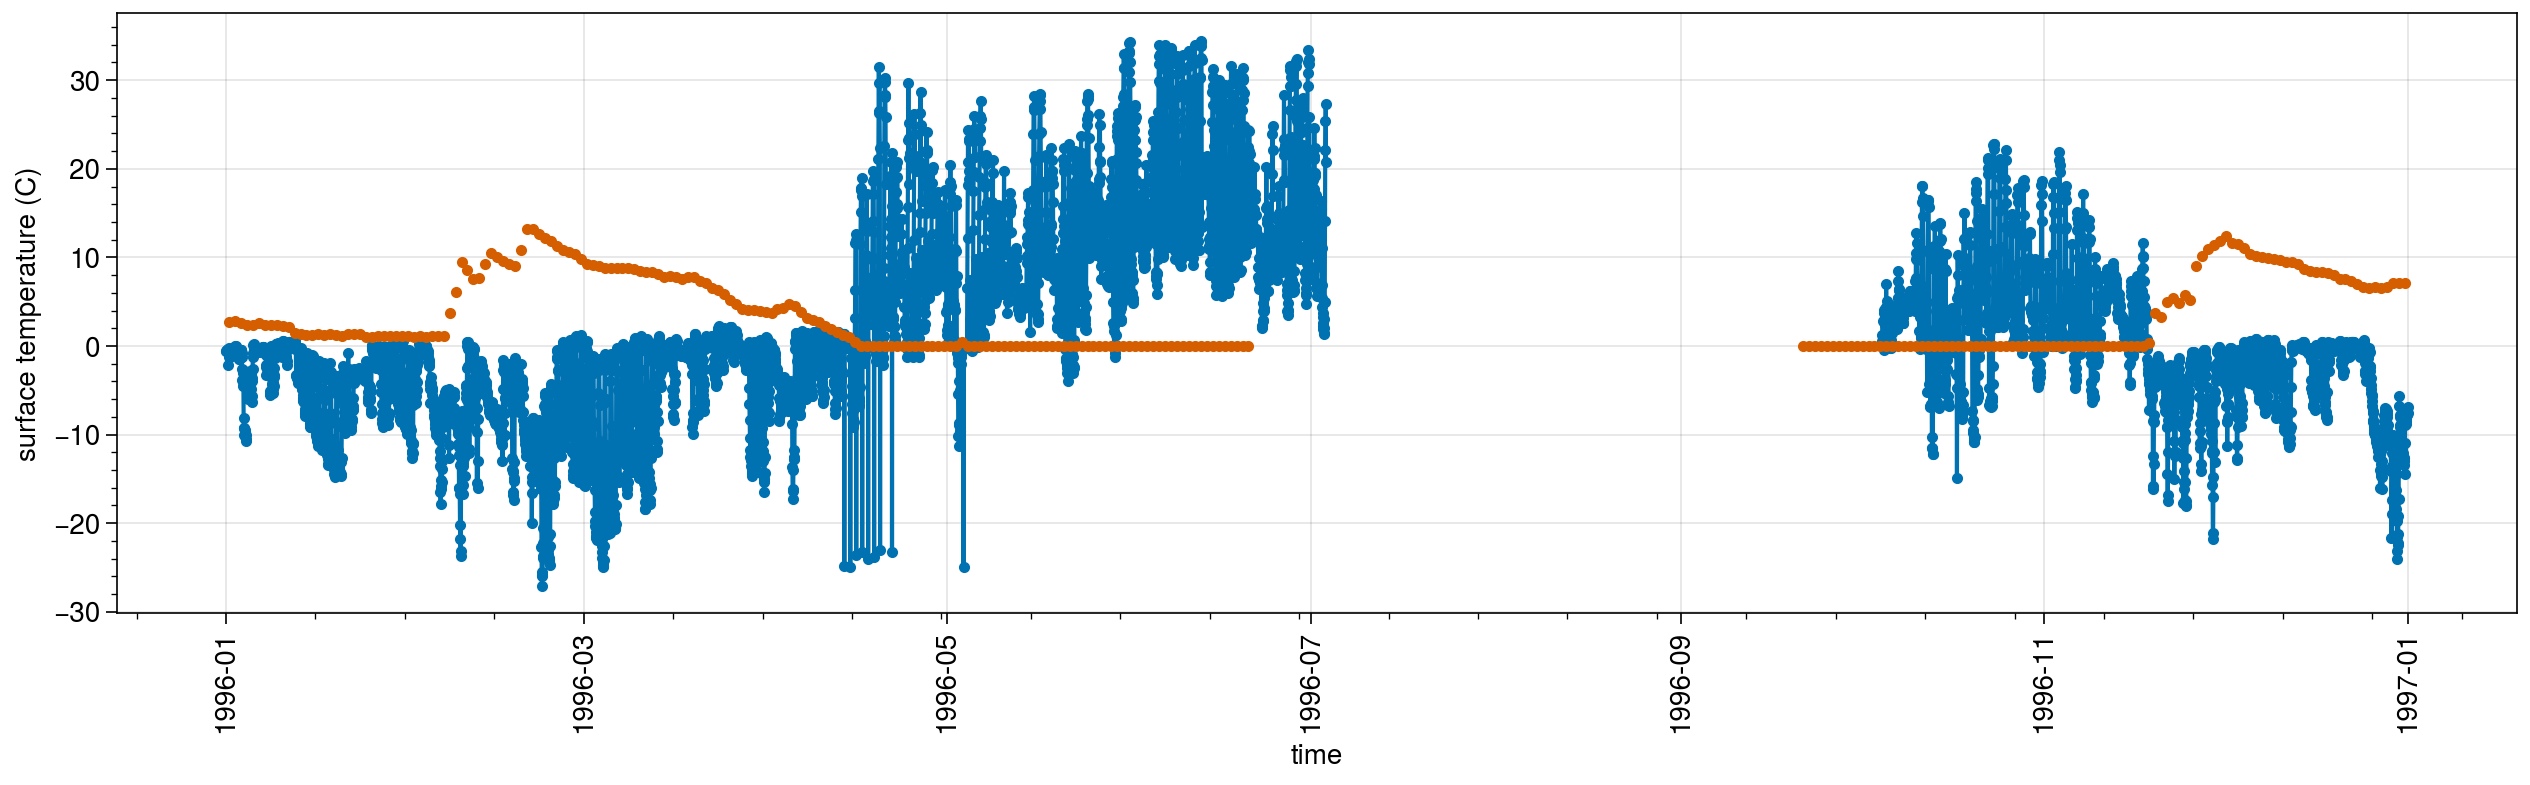

In [277]:
fig, axs = plot.subplots(ncols=1, nrows=1, aspect=4, axwidth=12, sharey=0)

axs[0].plot(df_h_eval_menard2019.ts.sel(time=slice('1996','1996')), marker='.')
axs[0].plot(df_h_eval_menard2019.snd_auto.sel(time=slice('1996','1996'))*10, marker='.')
# axs[0].plot(ds_d_eval_morin2012['SWE [kg/m**2] (Cosmic Ray Counter, NRC)'], marker='.')

## Albedo

(<matplotlib.lines.Line2D at 0x1511773581c0>,)

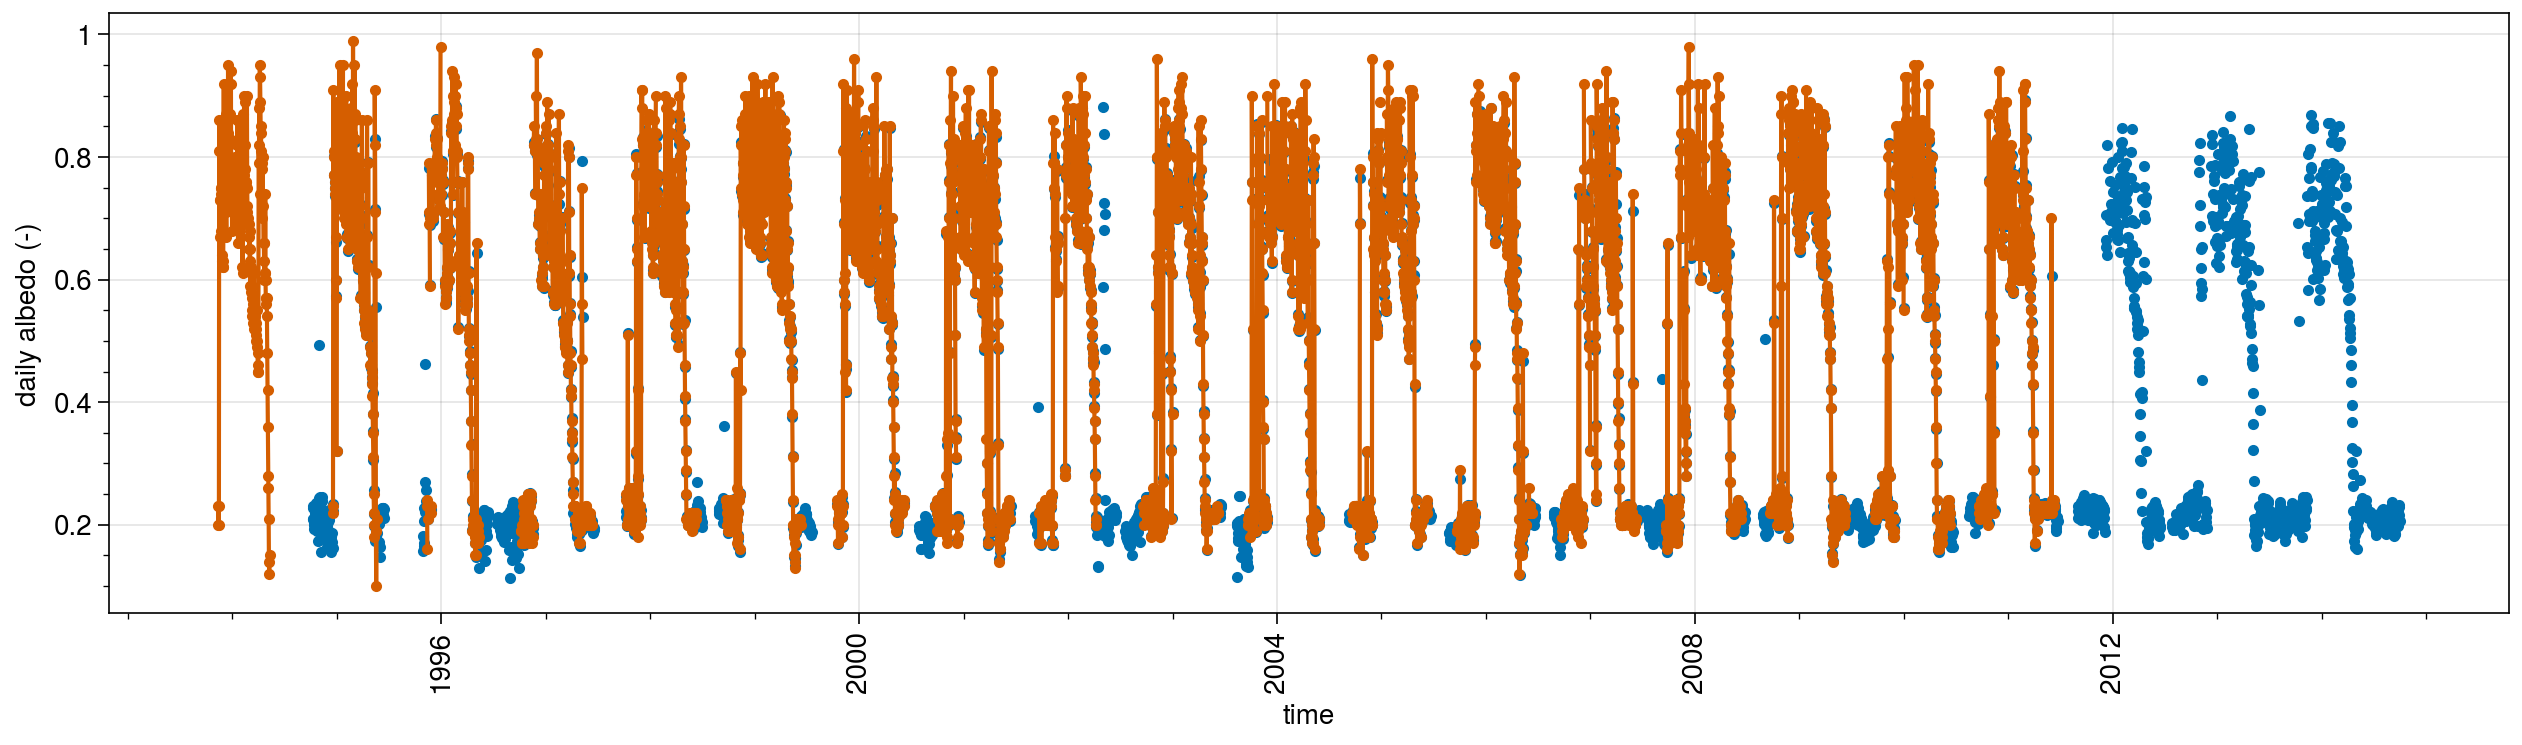

In [281]:
fig, axs = plot.subplots(ncols=1, nrows=1, aspect=4, axwidth=12, sharey=0)

axs[0].plot(df_h_eval_menard2019.albs, marker='.')
axs[0].plot(ds_d_eval_morin2012['Albedo [%] (Calculated)'], marker='.')

(<matplotlib.lines.Line2D at 0x151177283220>,)

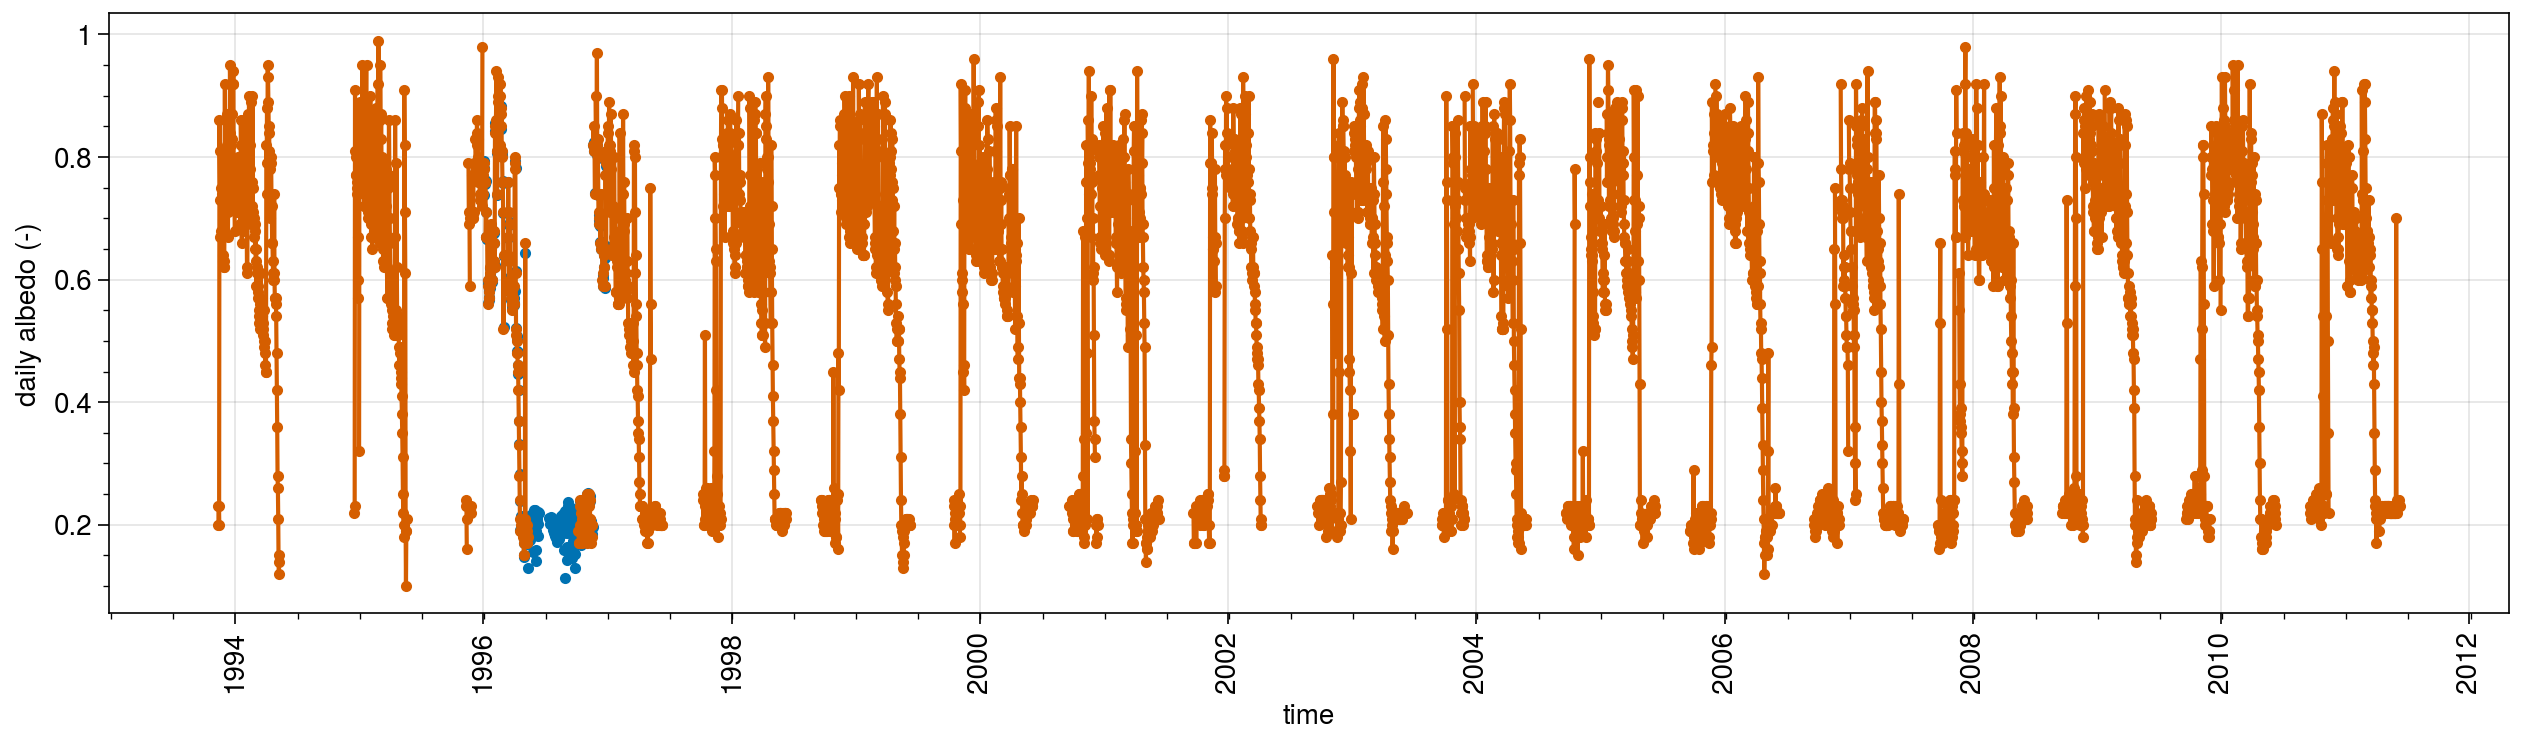

In [282]:
fig, axs = plot.subplots(ncols=1, nrows=1, aspect=4, axwidth=12, sharey=0)

axs[0].plot(df_h_eval_menard2019.albs.sel(time=slice('1996','1996')), marker='.')
axs[0].plot(ds_d_eval_morin2012['Albedo [%] (Calculated)'], marker='.')

## Soil temperature

(<matplotlib.lines.Line2D at 0x1511770075e0>,
 <matplotlib.lines.Line2D at 0x151177012d60>)

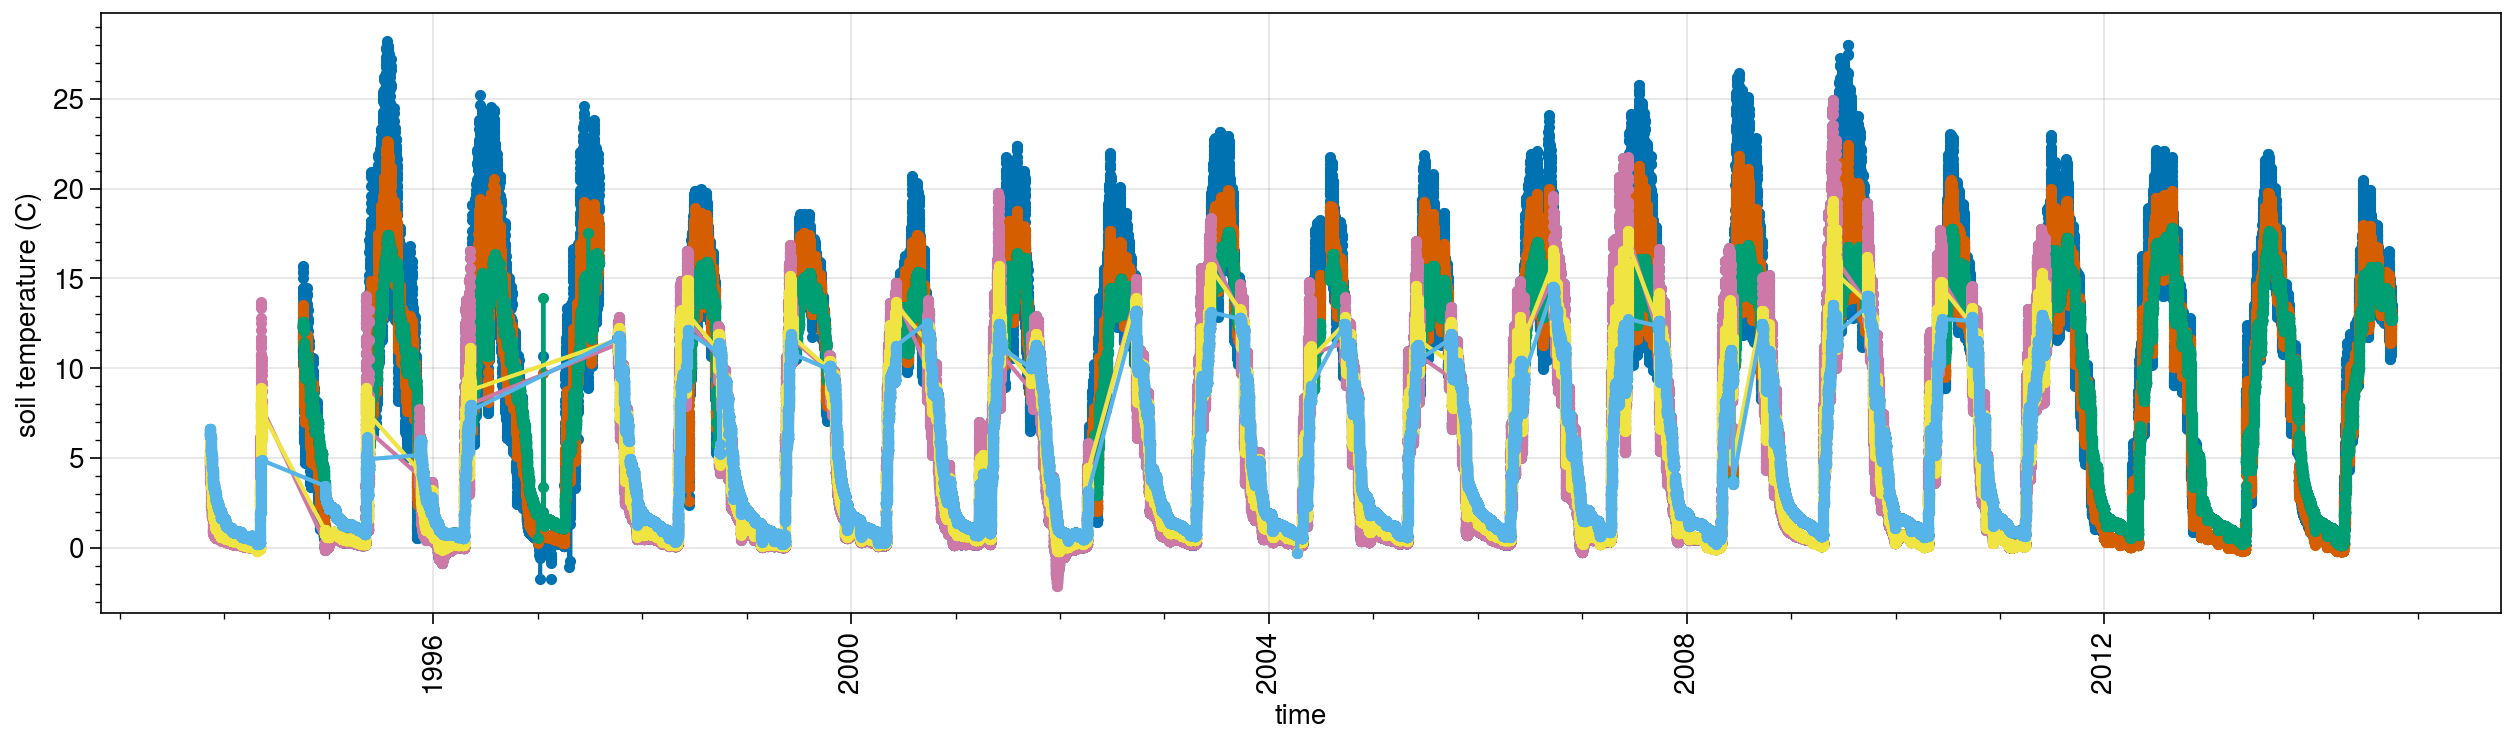

In [285]:
fig, axs = plot.subplots(ncols=1, nrows=1, aspect=4, axwidth=12, sharey=0)

axs[0].plot(df_h_eval_menard2019.tsl, marker='.')
axs[0].plot(ds_h_soilt_morin2012['t [°C]'], marker='.')

(<matplotlib.lines.Line2D at 0x151176f3f8b0>,
 <matplotlib.lines.Line2D at 0x151176f5f7f0>)

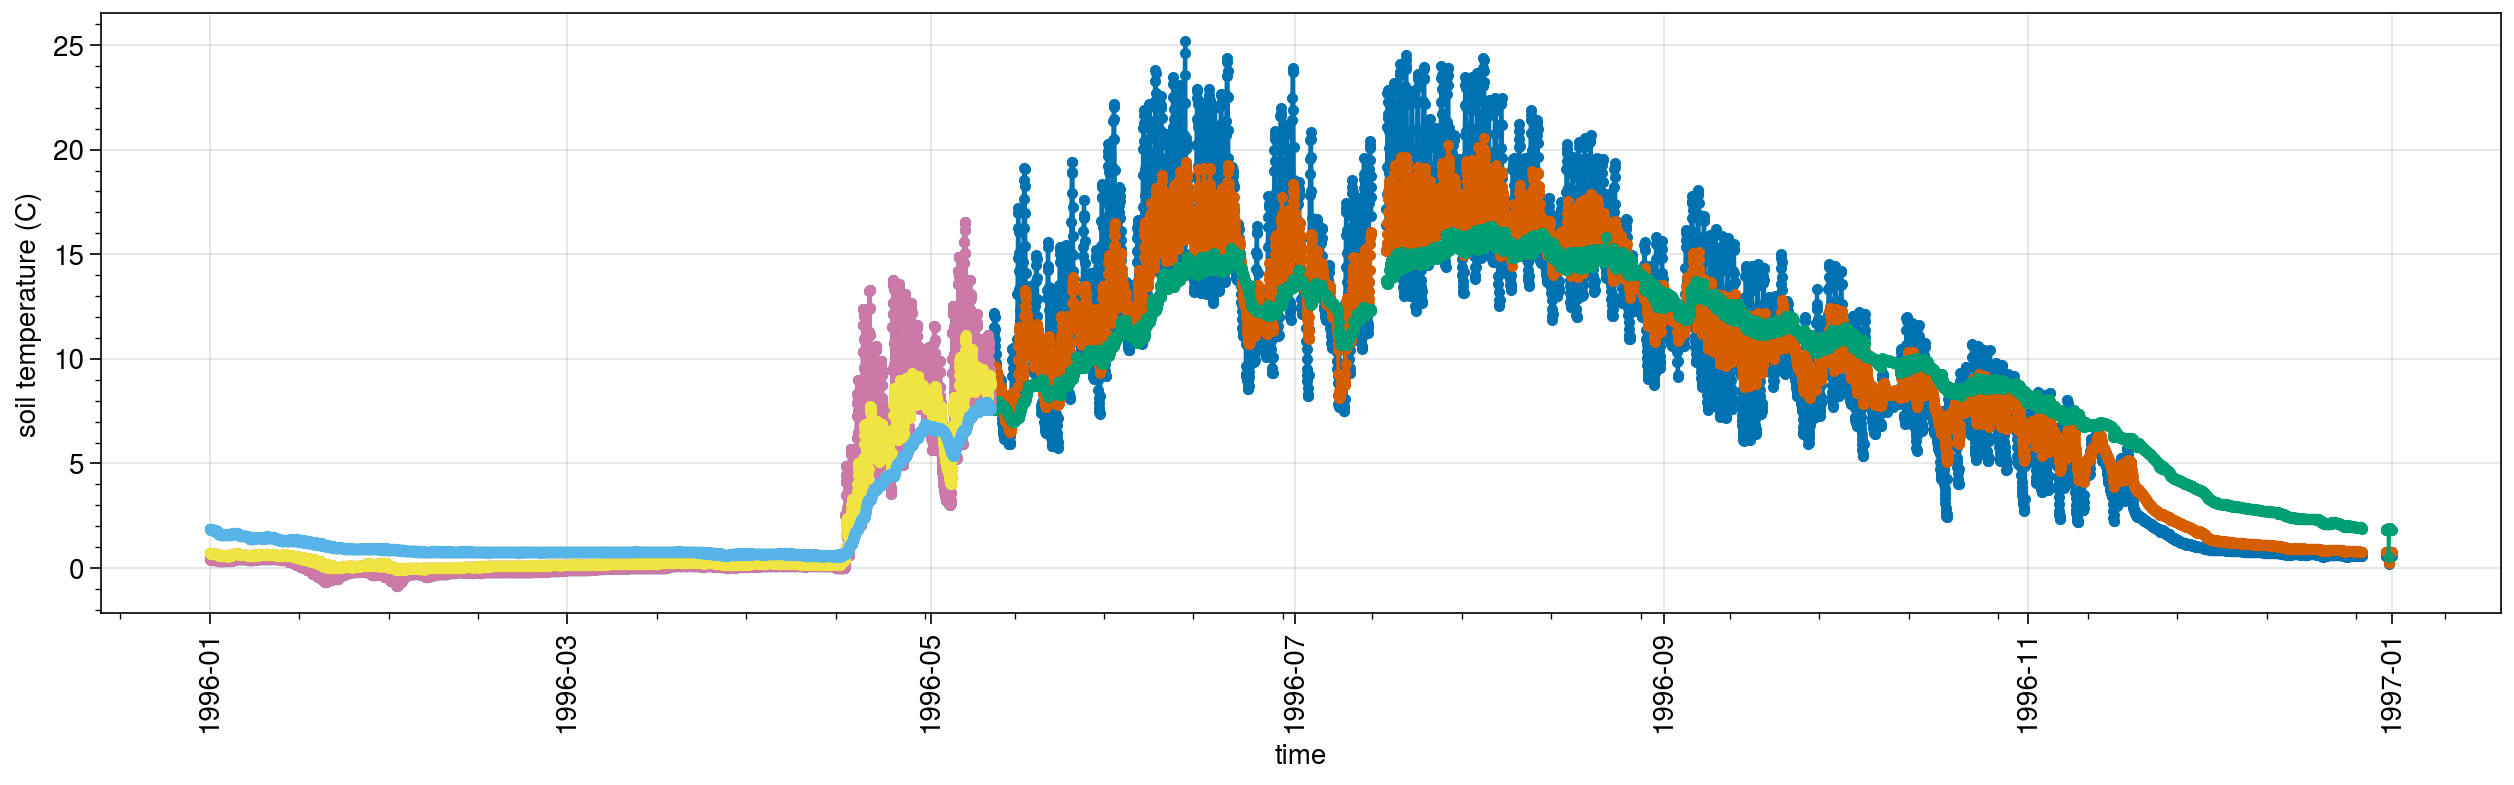

In [286]:
fig, axs = plot.subplots(ncols=1, nrows=1, aspect=4, axwidth=12, sharey=0)

axs[0].plot(df_h_eval_menard2019.tsl.sel(time=slice('1996','1996')), marker='.')
axs[0].plot(ds_h_soilt_morin2012['t [°C]'].sel(time=slice('1996','1996')), marker='.')

# Lejeune2019

## Snow Depth

In [287]:
path_lejeune2019

'/home/lalandmi/Dropbox/data/ESM-SnowMIP_all/CRYOBSCLIM_CDP'

In [288]:
df_h_eval_lejeune2019 = xr.open_dataset(path_lejeune2019+'/CRYOBSCLIM.CDP.2018.HourlySnow.nc')
df_d_eval_lejeune2019 = xr.open_dataset(path_lejeune2019+'/CRYOBSCLIM.CDP.2018.MetSnowDaily.nc')
df_h_eval_lejeune2019

<xarray.Dataset>
Dimensions:                   (time: 254208)
Coordinates:
  * time                      (time) datetime64[ns] 1993-08-01 ... 2022-07-31...
Data variables:
    Soil_temperature_10cm     (time) float64 ...
    Soil_temperature_20cm     (time) float64 ...
    Soil_temperature_50cm     (time) float64 ...
    Runoff_5m2                (time) float64 ...
    Runoff_1m2                (time) float64 ...
    Snow_depth                (time) float64 ...
    Surface_temperature       (time) float64 ...
    Ground_flux_1             (time) float64 ...
    Ground_flux_2             (time) float64 ...
    Ground_flux_3             (time) float64 ...
    Settling_disks_height_1   (time) float64 ...
    Settling_disks_height_2   (time) float64 ...
    Settling_disks_height_3   (time) float64 ...
    Settling_disks_height_4   (time) float64 ...
    Settling_disks_height_5   (time) float64 ...
    Settling_disks_height_6   (time) float64 ...
    Settling_disks_height_7   (time) float64 ...
    Settling_disks_height_8   (time) float64 ...
    Settling_disks_height_9   (time) float64 ...
    Settling_disks_height_10  (time) float64 ...
    Settling_disks_height_11  (time) float64 ...
    Settling_disks_height_12  (time) float64 ...
    Settling_disks_height_13  (time) float64 ...
    Settling_disks_height_14  (time) float64 ...
    Settling_disks_height_15  (time) float64 ...
    Settling_disks_height_16  (time) float64 ...
    Settling_disks_height_17  (time) float64 ...
    Settling_disks_height_18  (time) float64 ...
    Settling_disks_height_19  (time) float64 ...
    Settling_disks_height_20  (time) float64 ...
    Settling_disks_temp_1     (time) float64 ...
    Settling_disks_temp_2     (time) float64 ...
    Settling_disks_temp_3     (time) float64 ...
    Settling_disks_temp_4     (time) float64 ...
    Settling_disks_temp_5     (time) float64 ...
    Settling_disks_temp_6     (time) float64 ...
    Settling_disks_temp_7     (time) float64 ...
    Settling_disks_temp_8     (time) float64 ...
    Settling_disks_temp_9     (time) float64 ...
    Settling_disks_temp_10    (time) float64 ...
    Settling_disks_temp_11    (time) float64 ...
    Settling_disks_temp_12    (time) float64 ...
    Settling_disks_temp_13    (time) float64 ...
    Settling_disks_temp_14    (time) float64 ...
    Settling_disks_temp_15    (time) float64 ...
    Settling_disks_temp_16    (time) float64 ...
    Settling_disks_temp_17    (time) float64 ...
    Settling_disks_temp_18    (time) float64 ...
    Settling_disks_temp_19    (time) float64 ...
    Settling_disks_temp_20    (time) float64 ...
    Soil_temperature_5cm_1    (time) float64 ...
    Soil_temperature_5cm_2    (time) float64 ...
    Soil_temperature_5cm_3    (time) float64 ...
    Soil_temperature_10cm_1   (time) float64 ...
    Soil_temperature_10cm_2   (time) float64 ...
    Soil_temperature_10cm_3   (time) float64 ...
    Soil_temperature_20cm_1   (time) float64 ...
    Soil_temperature_20cm_2   (time) float64 ...
    Soil_temperature_30cm_1   (time) float64 ...
    Soil_temperature_30cm_2   (time) float64 ...
    Soil_moisture_5cm_1       (time) float64 ...
    Soil_moisture_5cm_2       (time) float64 ...
    Soil_moisture_5cm_3       (time) float64 ...
    Soil_moisture_10cm_1      (time) float64 ...
    Soil_moisture_10cm_2      (time) float64 ...
    Soil_moisture_10cm_3      (time) float64 ...
    Soil_moisture_20cm_1      (time) float64 ...
    Soil_moisture_20cm_2      (time) float64 ...
    Soil_moisture_30cm_1      (time) float64 ...
    Soil_moisture_30cm_2      (time) float64 ...
Attributes:
    history:  Thu Feb  9 11:25:20 2023: ncrcat CDP_hourly_19930801_20170731.n...
    NCO:      netCDF Operators version 4.9.1 (Homepage = http://nco.sf.net, C...

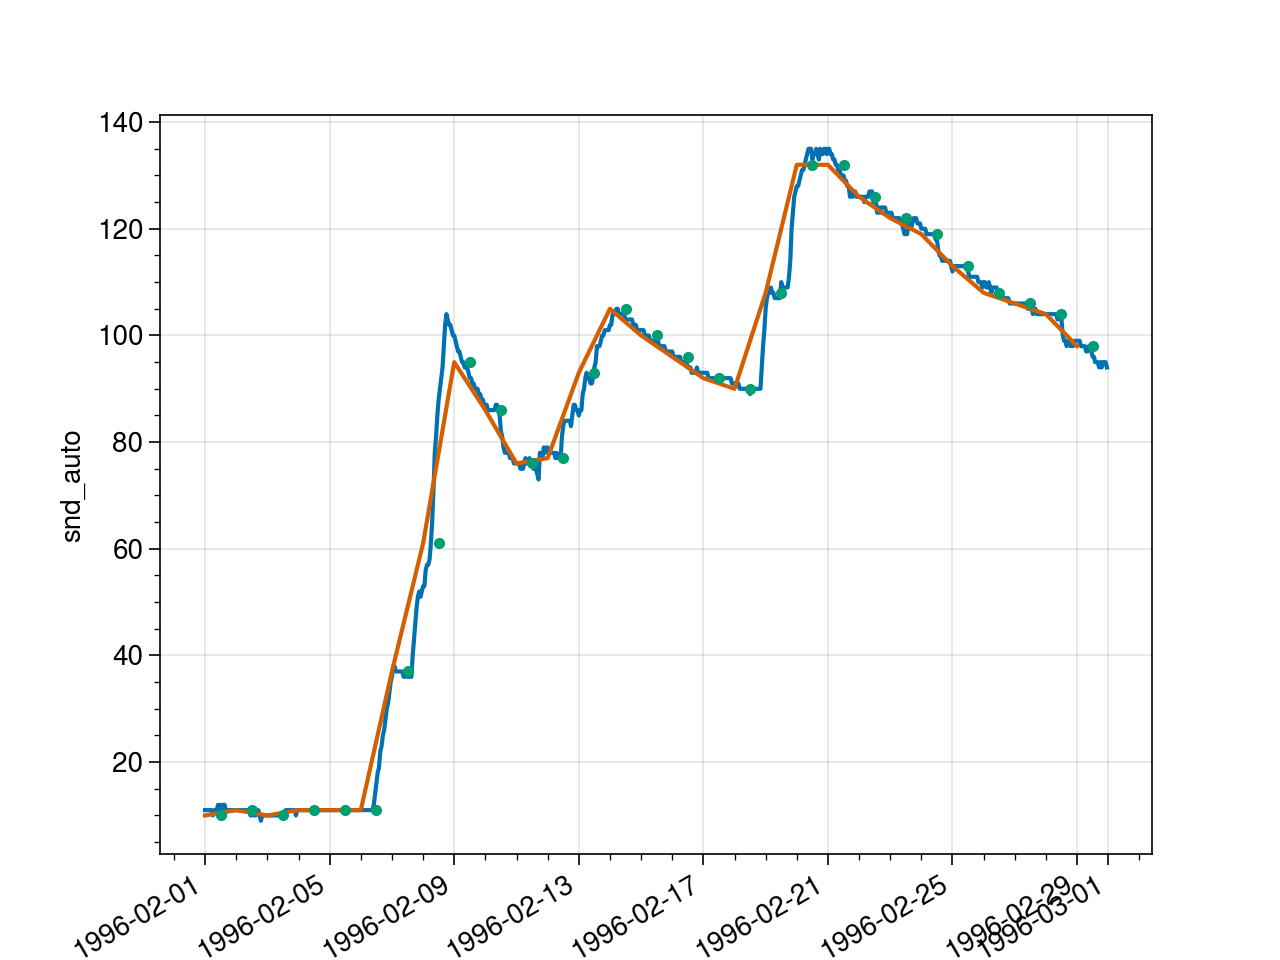

In [306]:
df_h_eval_lejeune2019.Snow_depth.sel(time='1996-02').plot()
(df_d_eval_lejeune2019.snow_depth_auto.sel(time='1996-02')*100).plot()
(df_h_eval_menard2019.snd_auto.sel(time='1996-02')*100).plot(marker='.')

/home/lalandmi/miniconda3/envs/phd_v3/lib/python3.8/site-packages/xarray/core/common.py:1123: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  grouper = pd.Grouper(
/home/lalandmi/miniconda3/envs/phd_v3/lib/python3.8/site-packages/xarray/core/common.py:1123: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  grouper = pd.Grouper(


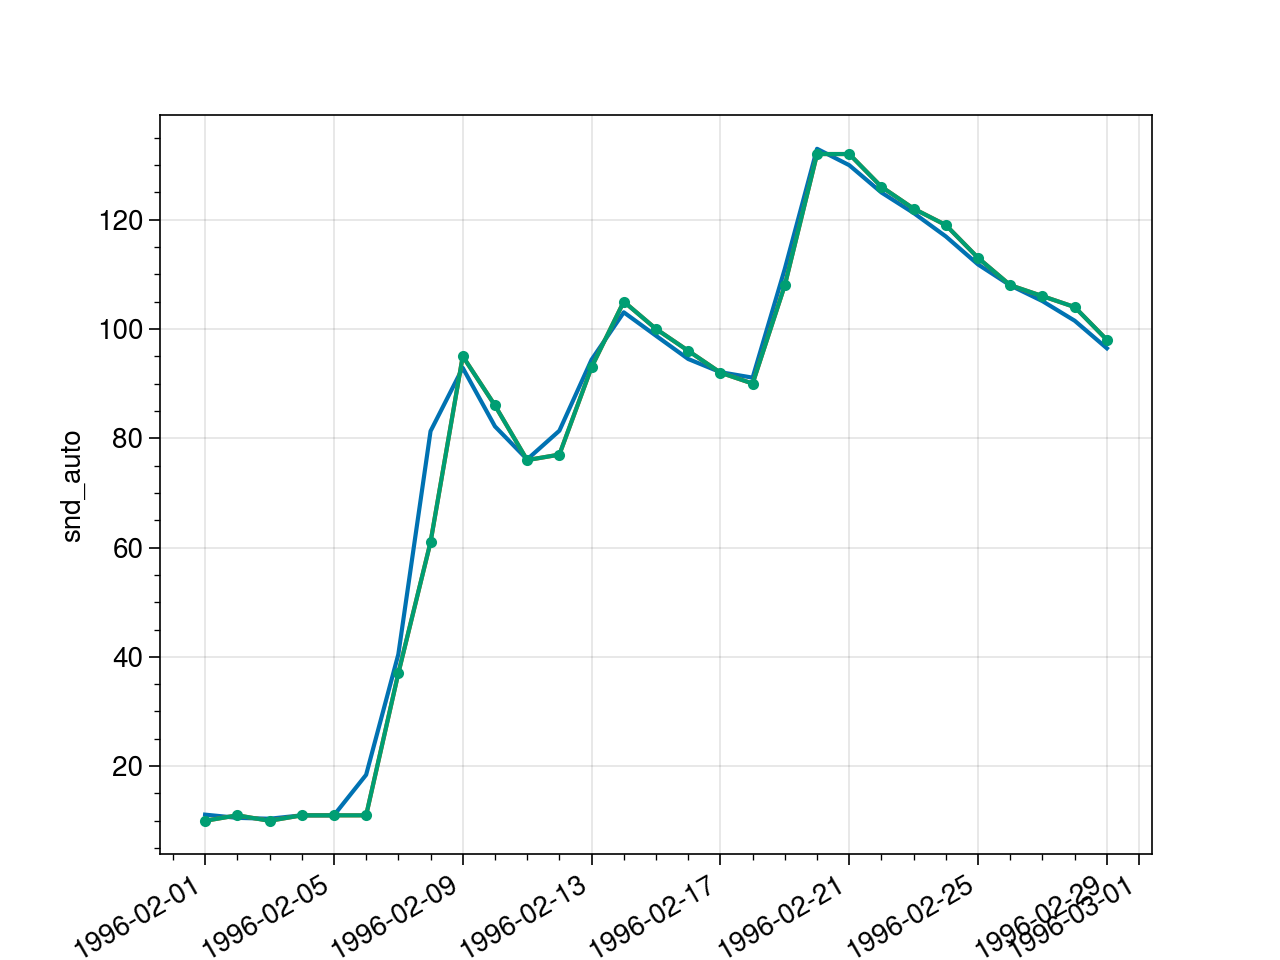

In [311]:
df_h_eval_lejeune2019.Snow_depth.sel(time='1996-02').resample(time='D').mean().plot()
(df_d_eval_lejeune2019.snow_depth_auto.sel(time='1996-02')*100).plot()
(df_h_eval_menard2019.snd_auto.sel(time='1996-02')*100).resample(time='D').mean().plot(marker='.')

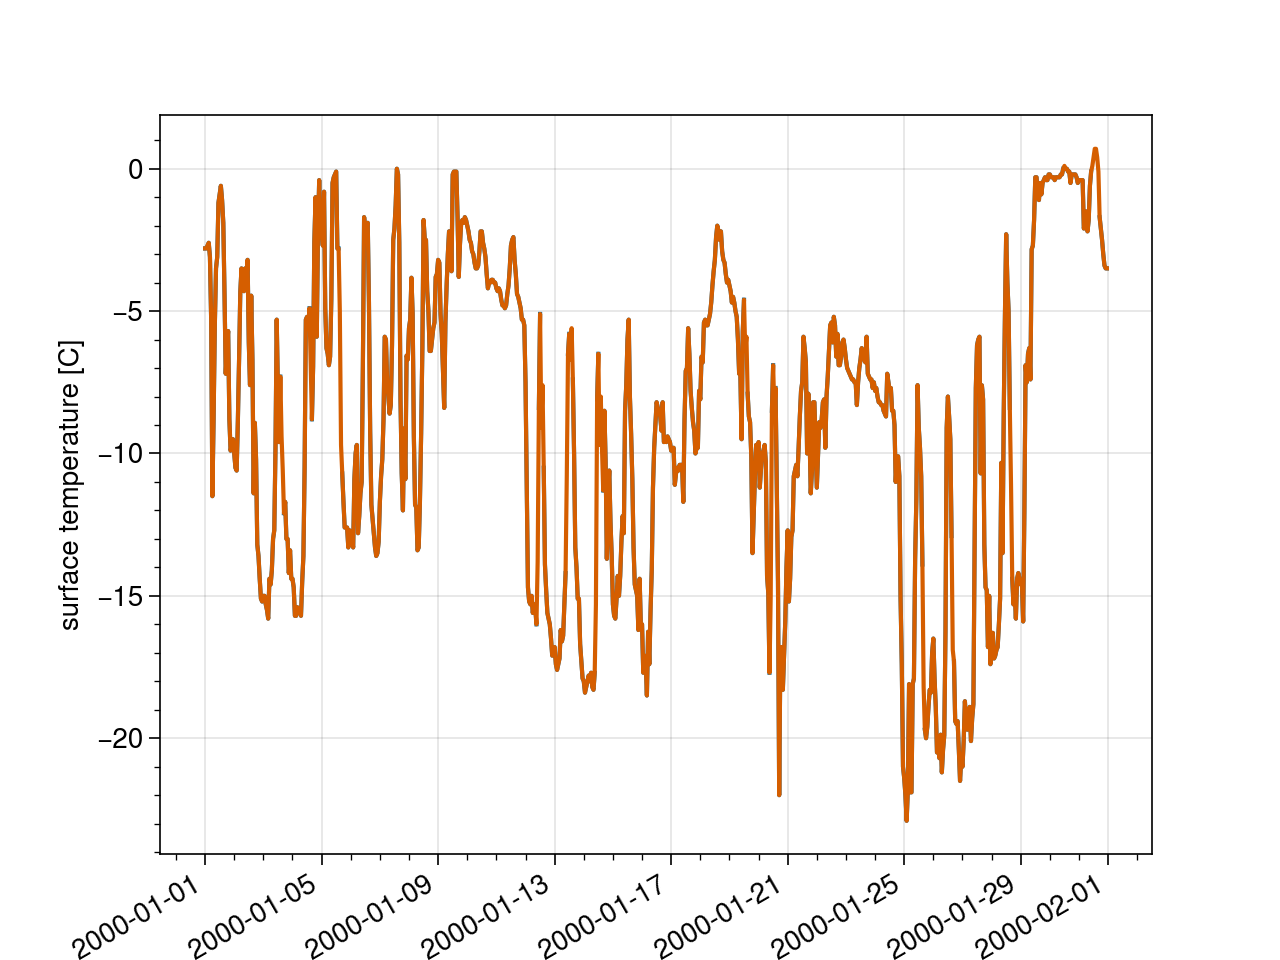

In [319]:
(df_h_eval_lejeune2019.Surface_temperature-273.15).sel(time='2000-01').plot()
df_h_eval_menard2019.ts.sel(time='2000-01').plot()